In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time
identity=pd.read_csv("train_identity.csv")
transaction=pd.read_csv("train_transaction.csv")

Wall time: 31.3 s


In [3]:
print("Shape of train_identity.csv",identity.shape)
print("Shape of train_transaction.csv",transaction.shape)

Shape of train_identity.csv (144233, 41)
Shape of train_transaction.csv (590540, 394)


In [4]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [5]:
identity.isnull().sum().sort_values(ascending=False).head()

id_24    139486
id_25    139101
id_07    139078
id_08    139078
id_21    139074
dtype: int64

In [6]:
transaction.columns[transaction.isnull().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=374)

In [7]:
transaction.isnull().sum().sort_values(ascending=False).head()

dist2    552913
D7       551623
D13      528588
D14      528353
D12      525823
dtype: int64

In [8]:
identity.TransactionID.nunique()

144233

In [9]:
transaction.TransactionID.nunique()

590540

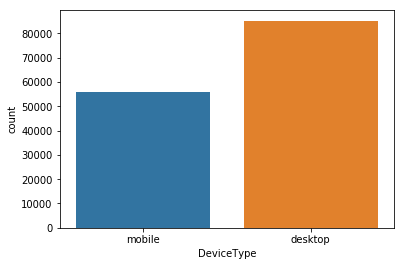

In [10]:
sns.countplot(data=identity,x="DeviceType")

In [11]:
identity.columns[identity.isnull().any()]#39 columns has null values

Index(['id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [12]:
#Number of null values in each column
null_identity_frame=identity.isnull().sum().to_frame().T

In [13]:
#Removing columns with more than 50% of missing values
drop_columns=[]
for col in null_identity_frame.columns:
    if(null_identity_frame.loc[0,col]==0):
        continue
    elif((null_identity_frame.loc[0,col]*100/identity.shape[0])>70):
        drop_columns.append(col)
    else:
        continue
       # print(f'columns {col} has {round(null_identity_frame.loc[0,col]*100/identity.shape[0])}% of null values')

In [14]:
identity.drop(columns=drop_columns,inplace=True)

In [15]:
identity.shape

(144233, 32)

In [16]:
identity.id_01.describe()

count    144233.000000
mean        -10.170502
std          14.347949
min        -100.000000
25%         -10.000000
50%          -5.000000
75%          -5.000000
max           0.000000
Name: id_01, dtype: float64

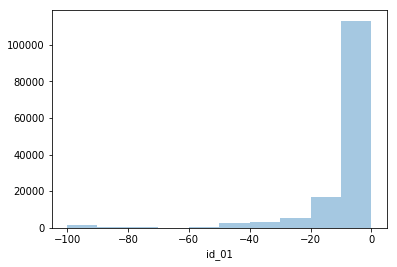

In [17]:
sns.distplot(identity.id_01,bins=10,hist=True,kde=False)

In [18]:
identity.id_01=[x if x>=-20 else -10 for x in identity.id_01]

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


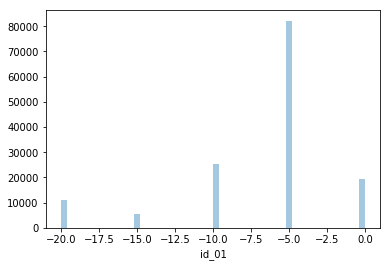

In [19]:
sns.distplot(identity.id_01,hist=True,kde=False)

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


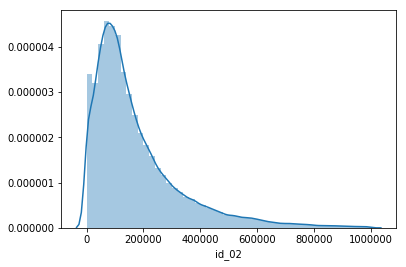

In [20]:
sns.distplot(identity[identity.id_02.notna()]["id_02"])

In [21]:
mean_id_02=identity.id_02.mean()

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


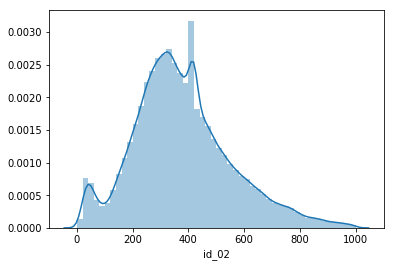

In [22]:
sns.distplot(np.power(identity.id_02.fillna(mean_id_02),0.5))#perform square root on id_02

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


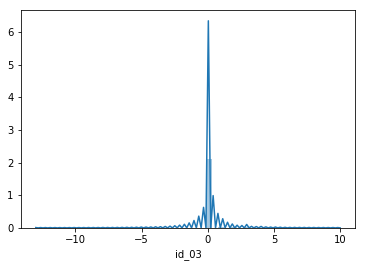

In [23]:
def distribution_plots(df,column_name):
    sns.distplot(df[df[column_name].notna()][column_name],kde=False,hist=True)
    plt.show()


sns.distplot(identity[identity.id_03.notna()]["id_03"])

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


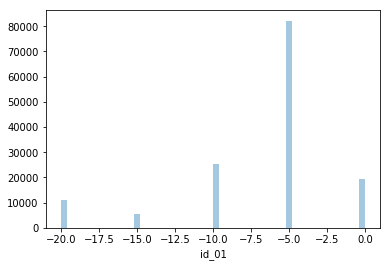

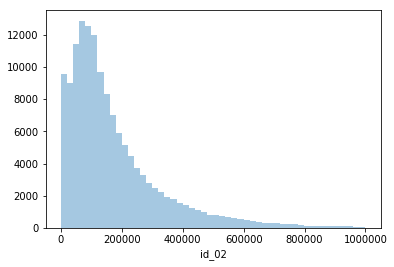

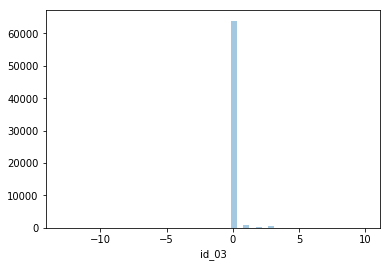

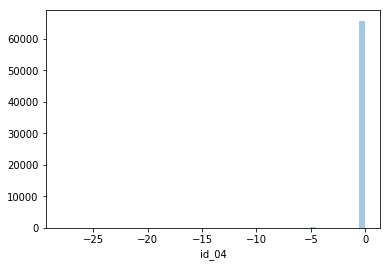

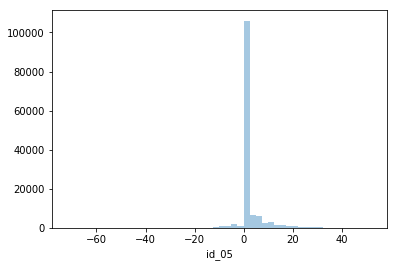

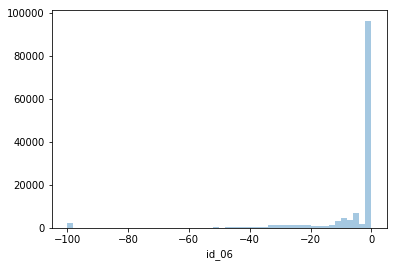

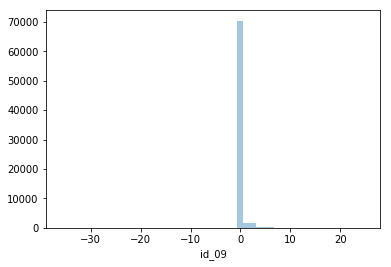

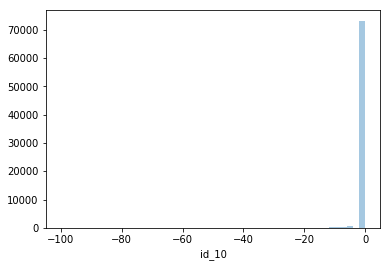

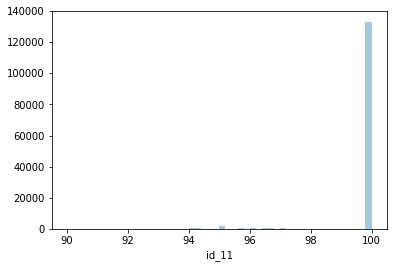

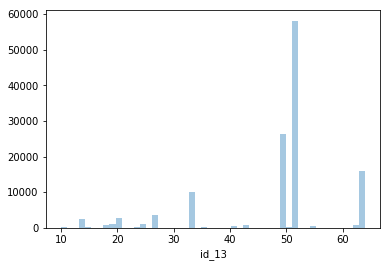

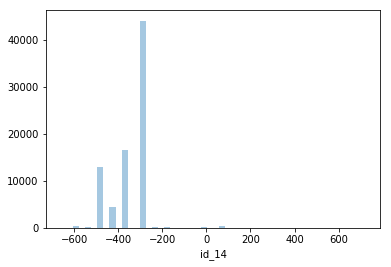

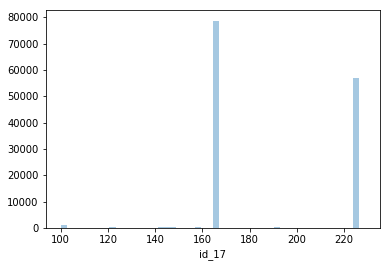

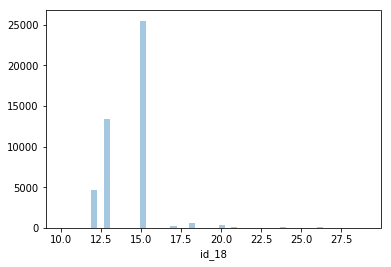

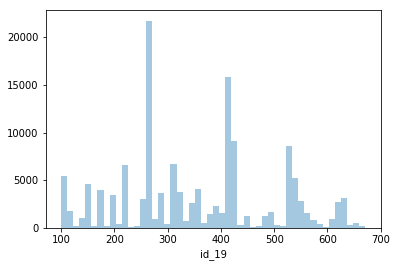

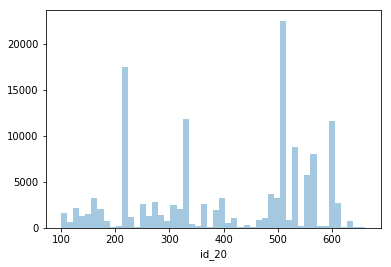

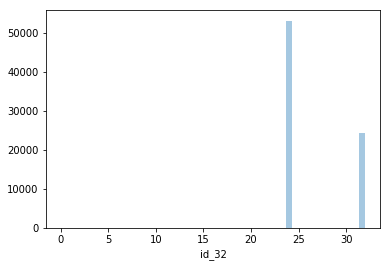

In [24]:
for col in identity.select_dtypes(exclude="object").columns:
    if col in ["TransactionID"]:
        continue
    else:
        distribution_plots(identity,col)

In [25]:
identity[identity.id_03.notna()].groupby("id_03").size().sort_values(ascending=False).head()

id_03
0.0    63903
1.0      863
3.0      668
2.0      421
5.0      109
dtype: int64

In [26]:
identity.id_03=[1 if x>0 else (-1 if x<0 else 0) for x in identity.id_03]

In [27]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_13',
       'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [28]:
identity[identity.id_04.notna()].groupby("id_04").size().sort_values(ascending=False).head()

id_04
 0.0    65739
-5.0      132
-6.0       98
-8.0       64
-4.0       51
dtype: int64

In [29]:
identity.id_04=[1 if x<0 else x for x in identity.id_04]

In [30]:
identity[identity.id_09.notna()].groupby("id_09").size().sort_values(ascending=False).head()

id_09
0.0    70378
1.0     1616
3.0      966
2.0      773
4.0      270
dtype: int64

In [31]:
identity.id_09=[1 if x>0 else (-1 if x<0 else 0) for x in identity.id_09]

In [32]:
identity[identity.id_10.notna()].groupby("id_10").size().sort_values(ascending=False).head()

id_10
 0.0    72879
-6.0      295
-5.0      247
-1.0      200
-8.0      147
dtype: int64

In [33]:
identity.id_10=[1 if x<0 else x for x in identity.id_10]

In [34]:
identity[identity.id_11==100].shape

(133162, 32)

In [35]:
#dropping id_11 since most have a value of 100
identity.drop(columns=["id_11"],inplace=True)

In [36]:
identity[identity.id_12.notna()].groupby("id_12").size().sort_values(ascending=False).head()

id_12
NotFound    123025
Found        21208
dtype: int64

In [37]:
identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_09', 'id_10', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17',
       'id_18', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [38]:
identity[identity.id_34.notna()].groupby("id_34").size().sort_values(ascending=False).head()#id_32 is mostly categorical

id_34
match_status:2     60011
match_status:1     17376
match_status:0       415
match_status:-1        3
dtype: int64

In [39]:
#parse id_34 

In [40]:
#id_32 is mostly categorical
identity[identity.DeviceInfo.notna()].groupby("DeviceInfo").size().sort_values(ascending=False).head()

DeviceInfo
Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
dtype: int64

In [41]:
identity.columns[identity.isnull().any()]

Index(['id_02', 'id_04', 'id_05', 'id_06', 'id_10', 'id_13', 'id_14', 'id_15',
       'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [42]:
identity.id_31.nunique()

130

In [43]:
#median_id_02=identity.id_02.median
identity.id_02.fillna(identity.id_02.median(),inplace=True)

In [44]:
#id_04 has low variance and hence being dropped
print(identity.id_04.value_counts())
identity.drop(columns=["id_04"],inplace=True)

0.0    65739
1.0      585
Name: id_04, dtype: int64


In [45]:
identity.id_05=[x if x>0 else -1 for x in identity.id_05]

In [46]:
identity.id_10.fillna(0,inplace=True)

In [47]:
#Number of missing values
identity[identity.columns[9]].isnull().sum()

16913

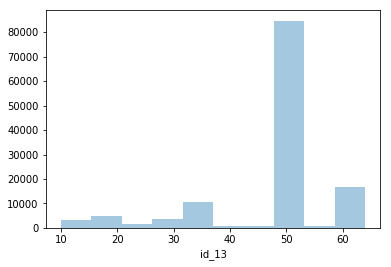

In [48]:
sns.distplot(identity[identity.id_13.notna()]["id_13"],hist=True,kde=False,bins=10)

In [49]:
#mode_id_13=identity.id_13.mode()
identity.id_13.fillna(identity.id_13.mode(),inplace=True)

In [50]:
identity.id_14=[1 if x >0 else (-1 if x < 0 else 0) for x in identity.id_14]

In [51]:
identity[identity.columns[11]].isnull().sum()

3248

In [52]:
identity.id_15.value_counts()

Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64

In [53]:
identity.id_15.fillna("Unknown",inplace=True)

In [54]:
identity[identity.columns[16]].isnull().sum()

4972

In [55]:
identity.id_16.fillna("NotFound",inplace=True)

In [56]:
identity[identity.columns[17]].isnull().sum()

3255

In [57]:
identity.id_28.value_counts()#No idea how to handle this.Need to explore more

Found    76232
New      64746
Name: id_28, dtype: int64

In [58]:
identity[identity.columns[18]].isnull().sum()

3255

In [59]:
identity.id_29.fillna("NotFound",inplace=True)

In [60]:
#id_31 need to explore more to fillna

In [61]:
identity.id_32.fillna(24,inplace=True)

In [62]:
identity[identity.columns[22]].isnull().sum()

70944

In [63]:
identity.drop(columns=["id_33"],inplace=True)

In [64]:
identity.id_34.unique()

array(['match_status:2', 'match_status:1', nan, 'match_status:0',
       'match_status:-1'], dtype=object)

In [65]:
identity.id_34=[1 if x=="match_status:1" else x for x in identity.id_34]
identity.id_34=[2 if x=="match_status:2" else x for x in identity.id_34]
identity.id_34=[-1 if x=="match_status:-1" else x for x in identity.id_34]
identity.id_34=[0 if x=="match_status:0" else x for x in identity.id_34]

In [66]:
identity.id_34.fillna(-1,inplace=True)

In [67]:
identity[identity.columns[28]].isnull().sum()

25567

In [68]:
#Need to explore id_35,36,37,38 to fill missing values

In [69]:
identity.DeviceType.value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [70]:
identity.id_06.fillna(0,inplace=True)
identity.id_13.fillna(52,inplace=True)
identity.id_17.fillna(166,inplace=True)

In [71]:
identity.id_18.fillna(15,inplace=True)

In [72]:
#median_id_19=identity.id_19.median()
identity.id_19.fillna(identity.id_19.median(),inplace=True)

In [73]:
identity.columns[identity.isnull().any()]

Index(['id_20', 'id_28', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [74]:
identity.drop(columns=['id_20', 'id_28', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38','DeviceType', 'DeviceInfo'],inplace=True)

In [75]:
identity.columns[identity.isnull().any()]

Index([], dtype='object')

In [76]:
%%time
train=transaction.merge(identity,how="left",on="TransactionID")

Wall time: 8.93 s


In [77]:
train.shape

(590540, 412)

In [78]:
train.columns[train.isnull().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_29',
       'id_32', 'id_34'],
      dtype='object', length=392)

In [79]:
train.isnull().sum().sort_values(ascending=False).T.head()

dist2    552913
D7       551623
D13      528588
D14      528353
D12      525823
dtype: int64

In [80]:
train[train["id_13"].notna()].shape

(144233, 412)

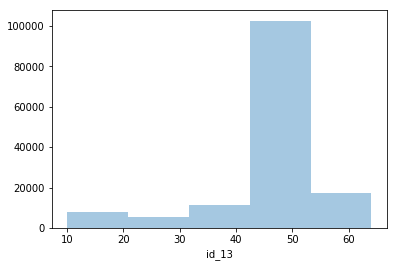

In [81]:
sns.distplot(train[train["id_13"].notna()]["id_13"],hist=True,bins=5,kde=False)

In [82]:
null_frame=train.isnull().sum().to_frame().T

In [83]:
train.shape

(590540, 412)

In [84]:
null_frame

TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
0              0        0              0               0          0      0   

   card2  card3  card4  card5   ...     id_13   id_14   id_15   id_16   id_17  \
0   8933   1565   1577   4259   ...    446307  446307  446307  446307  446307   

    id_18   id_19   id_29   id_32   id_34  
0  446307  446307  446307  446307  446307  

[1 rows x 412 columns]

In [85]:
#Drop columns with more than 50% of missing values
drop_train_columns=[]
for col in null_frame.columns:
    if col in ["TransactionID","isFraud"]:
        continue
    elif(round(null_frame.loc[0,col]*100/train.shape[0])>=50):
        drop_train_columns.append(col)

In [86]:
train.drop(columns=drop_train_columns,inplace=True)

In [87]:
train.shape

(590540, 220)

In [88]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...    V312  V313  V314 V315  V316  \
0    NaN  150.0    discover  142.0  ...     0.0   0.0   0.0  0.0   0.0   
1  404.0  150.0  mastercard  102.0  ...     0.0   0.0   0.0  0.0   0.0   
2  490.0  150.0        visa  166.0  ...     0.0   0.0   0.0  0.0   0.0   
3  567.0  150.0  mastercard  117.0  ...   135.0   0.0   0.0  0.0  50.0   
4  514.0  150.0  mastercard  102.0  ...     0.0   0.0   0.0  0.0   0.0   

     V317   V318  V319  V320  V321  
0   117.0    0.0   0.0   0.0   0.0  
1     0.0    0.0   0.0   0.0   0.0  
2     0.0    0.0   0.0   0.0   0.0  
3  1404.0  790.0   0.0   0.0   0.0  
4     0.0    0.0   0.0   0.0   0.0  

[5 rows x 220 columns]

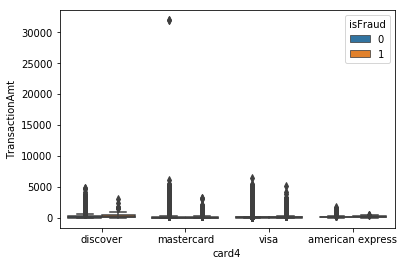

In [89]:
sns.boxplot(x="card4",y="TransactionAmt",data=train,hue="isFraud")

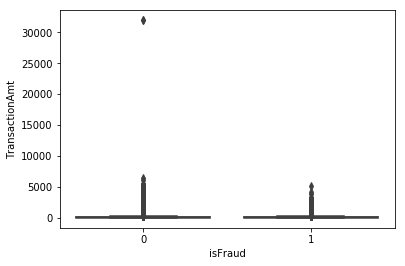

In [90]:
sns.boxplot(x="isFraud",y="TransactionAmt",data=train)

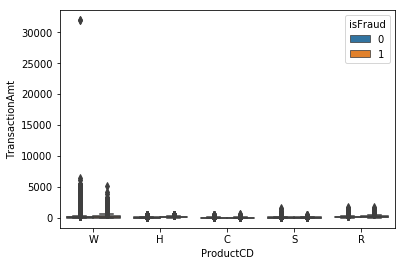

In [91]:
sns.boxplot(x="ProductCD",y="TransactionAmt",data=train,hue="isFraud")

In [92]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...    V312  V313  V314 V315  V316  \
0    NaN  150.0    discover  142.0  ...     0.0   0.0   0.0  0.0   0.0   
1  404.0  150.0  mastercard  102.0  ...     0.0   0.0   0.0  0.0   0.0   
2  490.0  150.0        visa  166.0  ...     0.0   0.0   0.0  0.0   0.0   
3  567.0  150.0  mastercard  117.0  ...   135.0   0.0   0.0  0.0  50.0   
4  514.0  150.0  mastercard  102.0  ...     0.0   0.0   0.0  0.0   0.0   

     V317   V318  V319  V320  V321  
0   117.0    0.0   0.0   0.0   0.0  
1     0.0    0.0   0.0   0.0   0.0  
2     0.0    0.0   0.0   0.0   0.0  
3  1404.0  790.0   0.0   0.0   0.0  
4     0.0    0.0   0.0   0.0   0.0  

[5 rows x 220 columns]

In [93]:
train[train.card2.isnull()].shape

(8933, 220)

In [94]:
train.card2.describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


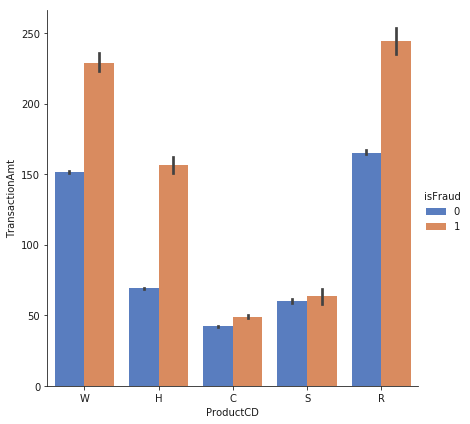

In [95]:
#f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.catplot(x="ProductCD", y="TransactionAmt", hue="isFraud", data=train,
                height=6, kind="bar", palette="muted")

Clearly there is a high probablility of a fraudelent transaction if the Product CD belongs to W,H or R

In [96]:
#Create a new feature to bucket ProductCD together into a single column
train["feature1_ProductCD"]=[1 if ((x=="W")&(y>150)) else 0 for x,y in zip(train.ProductCD,train.TransactionAmt)]

In [97]:
train["feature2_ProductCD"]=[1 if ((x=="H")&(y>70)) else 0 for x,y in zip(train.ProductCD,train.TransactionAmt)]
train["feature3_ProductCD"]=[1 if ((x=="R")&(y>160)) else 0 for x,y in zip(train.ProductCD,train.TransactionAmt)]

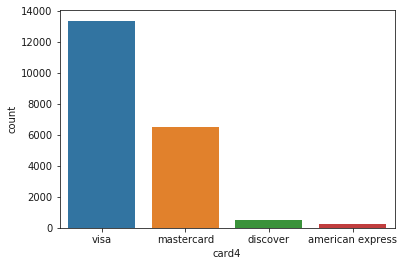

In [98]:
sns.countplot(x="card4",data=train[train.isFraud==1])

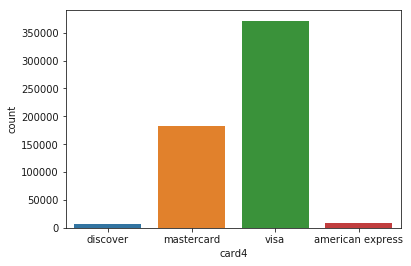

In [99]:
sns.countplot(x="card4",data=train[train.isFraud==0])

As can be seen from the barplot most of the frauds have occured with visa payments however the percentage of fraudulent transactions is almost same for visa and mastercard

In [100]:
#List all categorical columns
train.select_dtypes(include="object").columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4',
       'M6'],
      dtype='object')

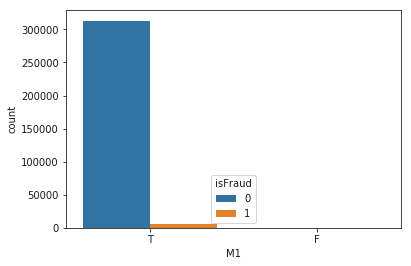

In [101]:
sns.countplot(x="M1",data=train,hue="isFraud")

This is interesting as it seems that all the transactions with M1 as False can be identified as Non-Fraud transactions.

In [102]:
train[train.isFraud==1].M1.value_counts()#this is a very good feature to predict Fraud

T    6342
Name: M1, dtype: int64

In [103]:
train=train.loc[train.TransactionAmt<10000,:].copy()

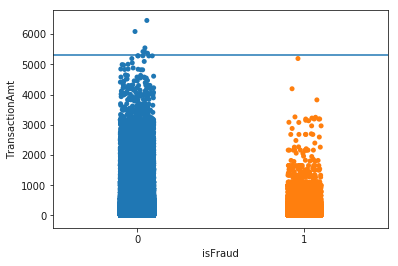

In [104]:
fig,ax=plt.subplots()
ax.axhline(5300)
sns.stripplot(x="isFraud", y="TransactionAmt", data=train, jitter=True,ax=ax)


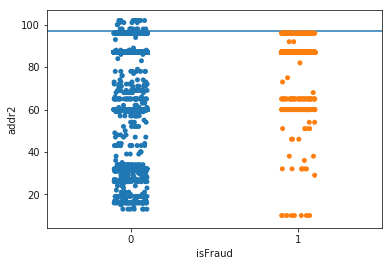

In [105]:
fig,ax=plt.subplots()
ax.axhline(97)
sns.stripplot(x="isFraud", y="addr2", data=train, jitter=True,ax=ax)

Good Feature as addr2 with value greater than 97 is clearly not a fraud

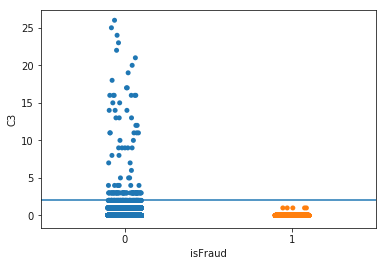

In [106]:
fig,ax=plt.subplots()
ax.axhline(2)
sns.stripplot(x="isFraud", y="C3", data=train, jitter=True,ax=ax)

Good Feature as C3 greater than 2 results in lots of non fraudulent transactions

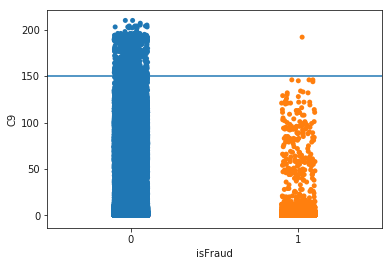

In [107]:
fig,ax=plt.subplots()
ax.axhline(150)
sns.stripplot(x="isFraud", y="C9", data=train, jitter=True,ax=ax)

C9 is a good feature as any values greater than 150 results in non fraud transactions

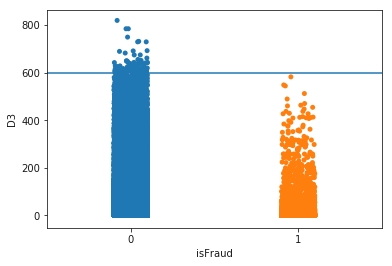

In [108]:
fig,ax=plt.subplots()
ax.axhline(600)
sns.stripplot(x="isFraud", y="D3", data=train, jitter=True,ax=ax)

D3 is clearly a good feature as any value greater than 600 can be identified as non Fraud

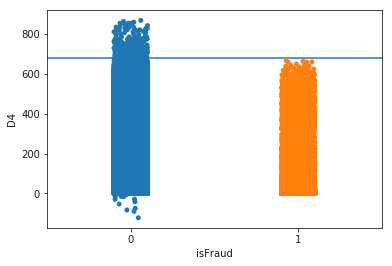

In [109]:
fig,ax=plt.subplots()
ax.axhline(680)
sns.stripplot(x="isFraud", y="D4", data=train, jitter=True,ax=ax)

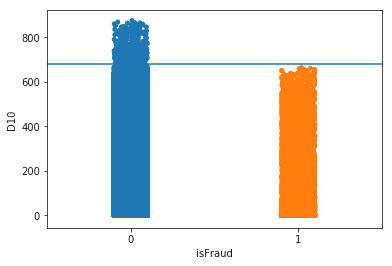

In [110]:
fig,ax=plt.subplots()
ax.axhline(680)
sns.stripplot(x="isFraud", y="D10", data=train, jitter=True,ax=ax)

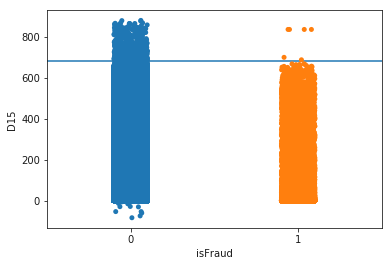

In [111]:
fig,ax=plt.subplots()
ax.axhline(680)
sns.stripplot(x="isFraud", y="D15", data=train, jitter=True,ax=ax)

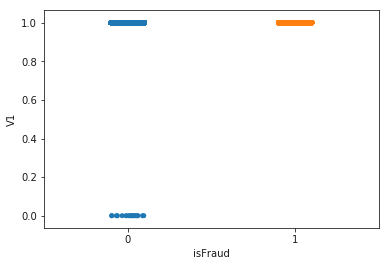

In [112]:
fig,ax=plt.subplots()
sns.stripplot(x="isFraud", y="V1", data=train, jitter=True,ax=ax)

V1=0 clearly says that transaction is not Fraud

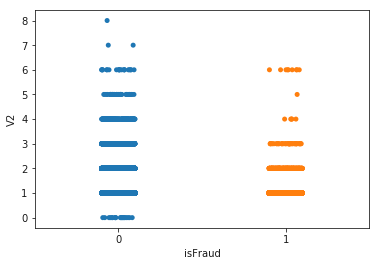

In [113]:
fig,ax=plt.subplots()
sns.stripplot(x="isFraud", y="V2", data=train, jitter=True,ax=ax)

V2=0 or 5 or greater than 6 clearly says that the transaction is not fraudulent

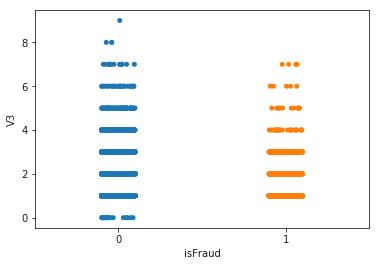

In [114]:
fig,ax=plt.subplots()
sns.stripplot(x="isFraud", y="V3", data=train, jitter=True,ax=ax)

V3=0 is not a fraud transaction

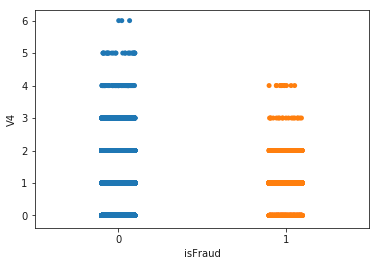

In [115]:
fig,ax=plt.subplots()
sns.stripplot(x="isFraud", y="V4", data=train, jitter=True,ax=ax)

V4 >2 have mostly non fraud transactions

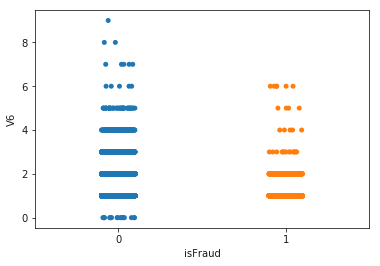

In [116]:
fig,ax=plt.subplots()
sns.stripplot(x="isFraud", y="V6", data=train, jitter=True,ax=ax)

V6>2 or V6 <1 are mostly non fraudulent transactions

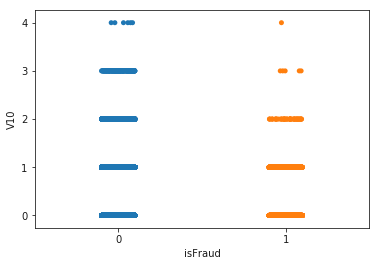

In [117]:
fig,ax=plt.subplots()
sns.stripplot(x="isFraud", y="V10", data=train, jitter=True,ax=ax)

V10>2 are non frauds

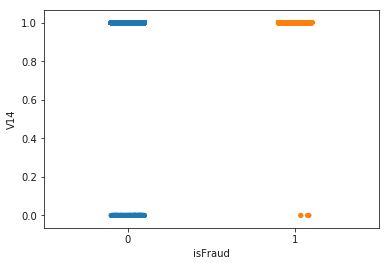

In [118]:
fig,ax=plt.subplots()
sns.stripplot(x="isFraud", y="V14", data=train, jitter=True,ax=ax)

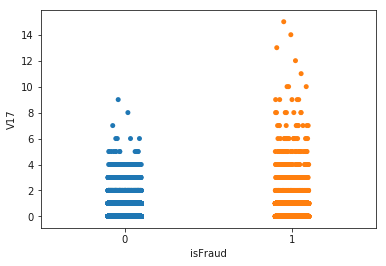

In [119]:
fig,ax=plt.subplots()
myplot=sns.stripplot(x="isFraud", y="V17", data=train, jitter=True,ax=ax)

In [120]:
#card4,card6,TransactionAmt,ProductCD
train["M4"].unique()

array(['M2', 'M0', nan, 'M1'], dtype=object)

In [121]:
train.select_dtypes(include="object").columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4',
       'M6'],
      dtype='object')

C:\Users\gandh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


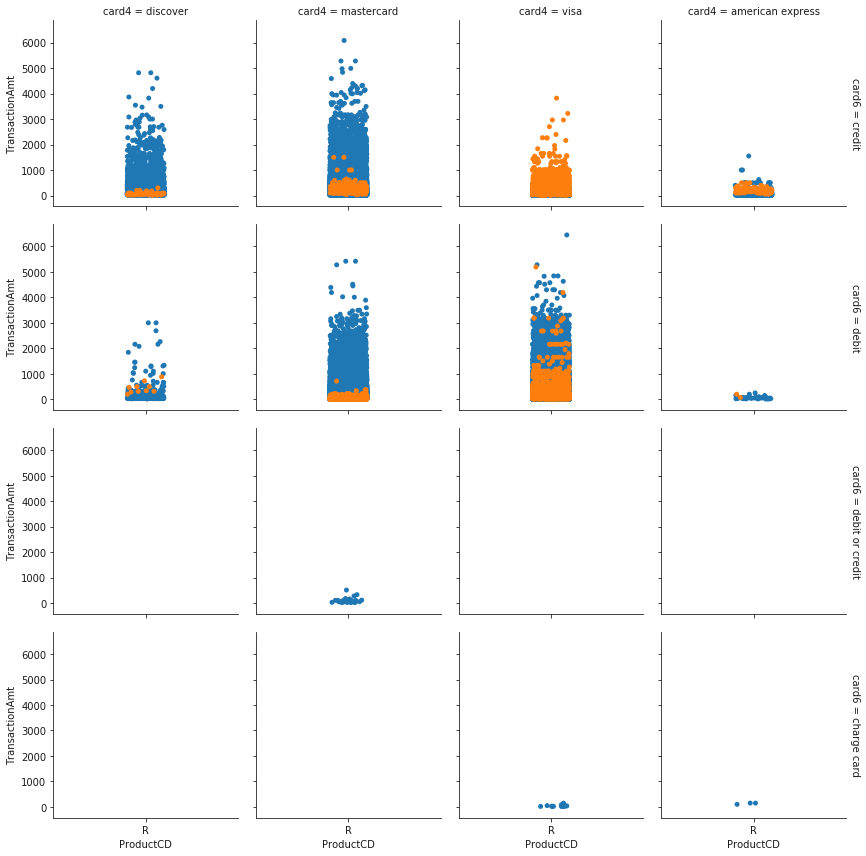

In [122]:
g = sns.FacetGrid(train, row="card6", col="card4", margin_titles=True,hue="isFraud")
g.map(sns.stripplot, "ProductCD", "TransactionAmt",jitter=True);

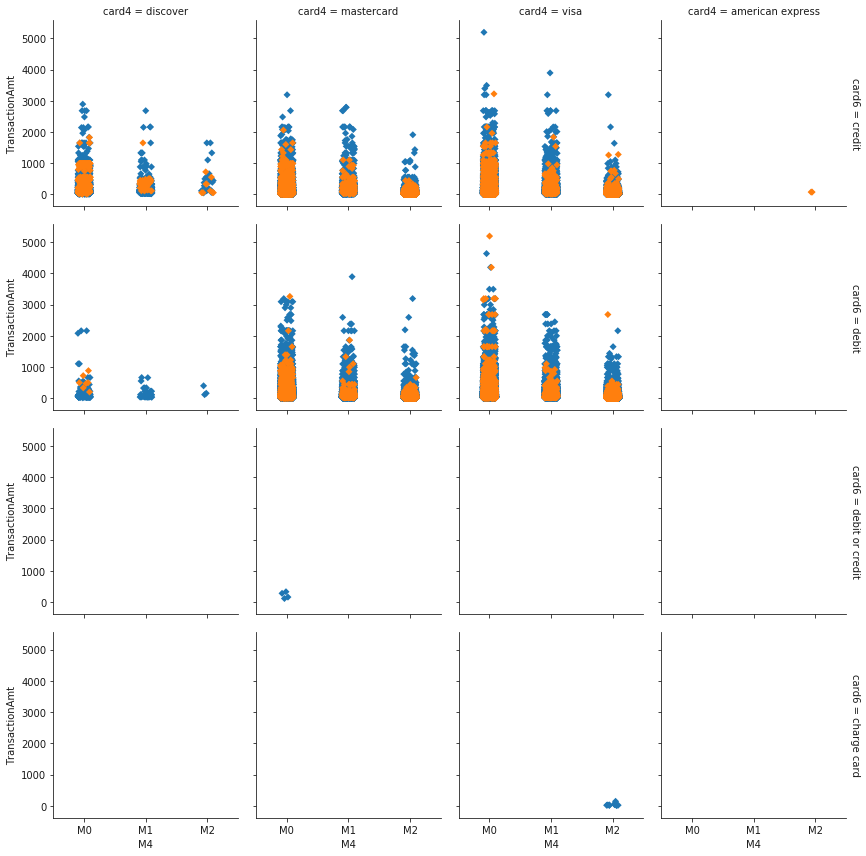

In [123]:
#fig,ax=plt.subplots()
g = sns.FacetGrid(train, row="card6", col="card4", margin_titles=True,hue="isFraud")
g.map(sns.stripplot, "M4", "TransactionAmt",jitter=True,order=["M0","M1","M2"], size=5, marker="D",edgecolor="gray");

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Wall time: 13min 10s


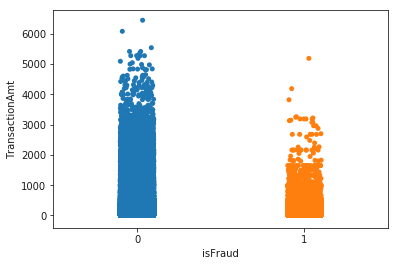

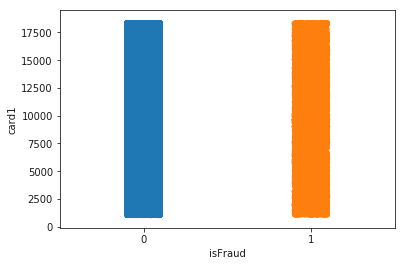

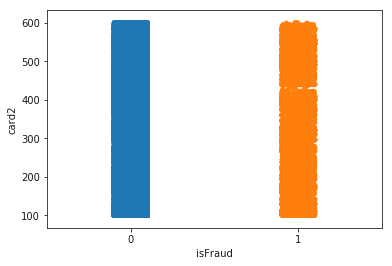

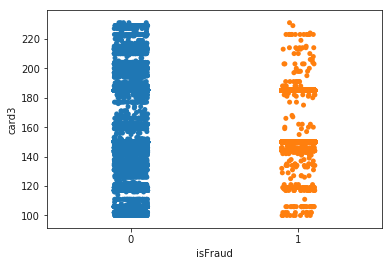

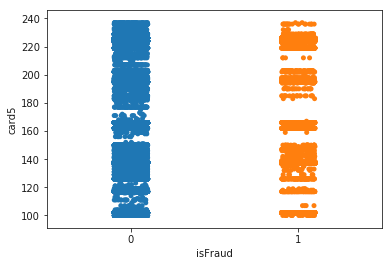

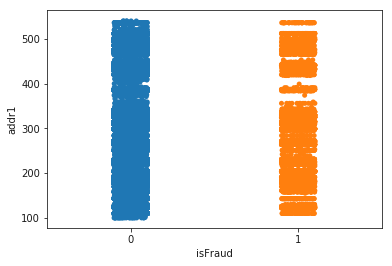

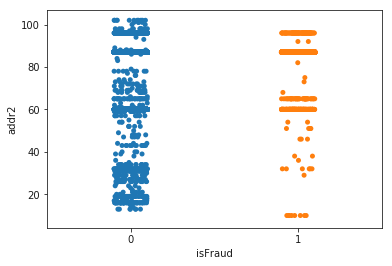

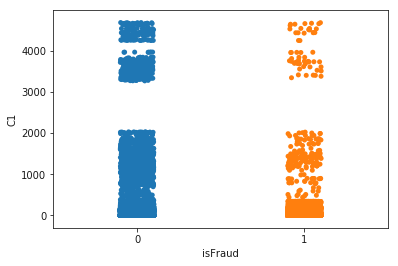

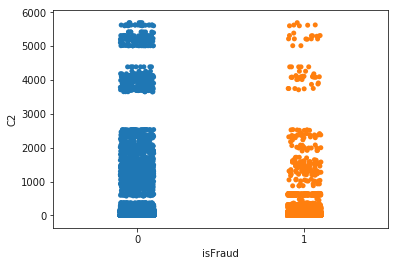

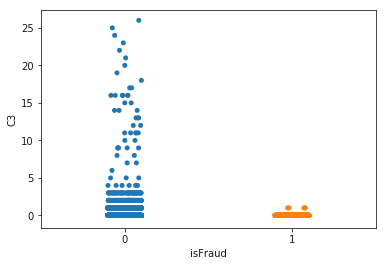

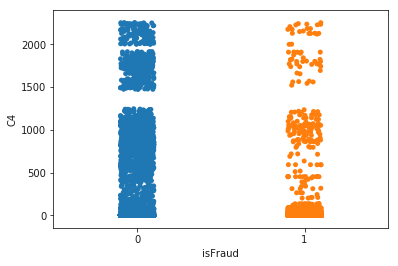

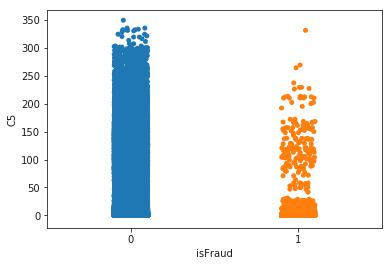

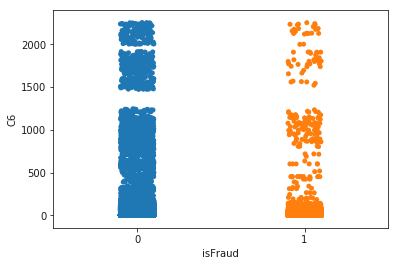

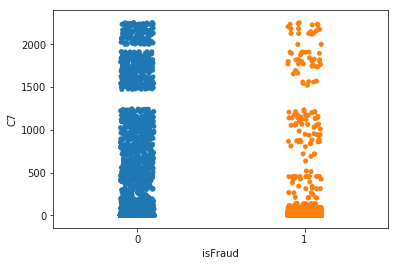

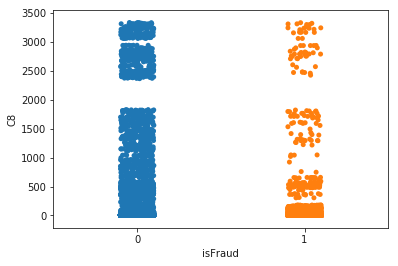

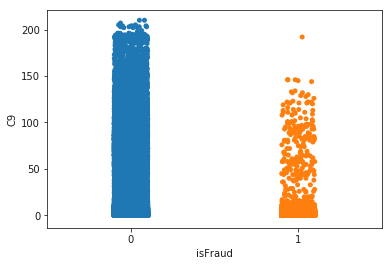

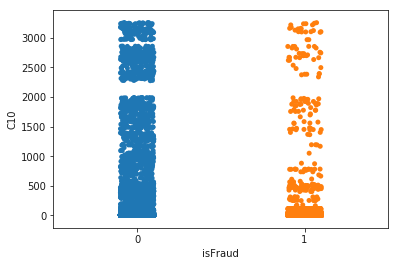

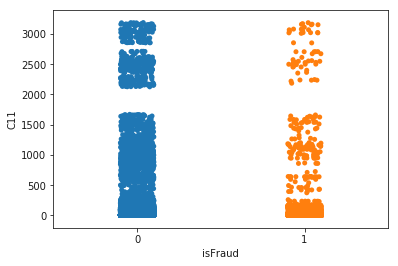

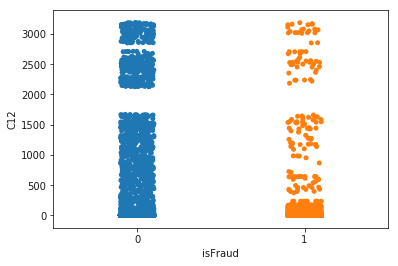

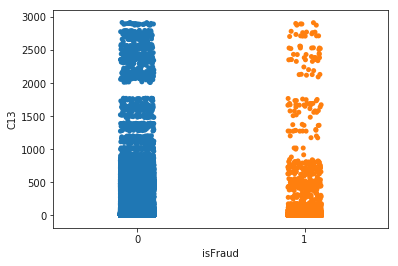

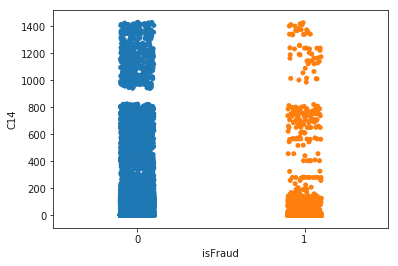

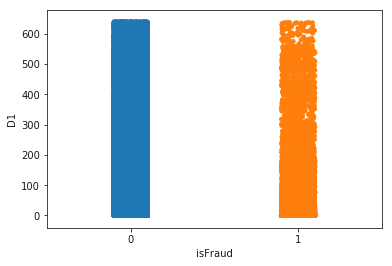

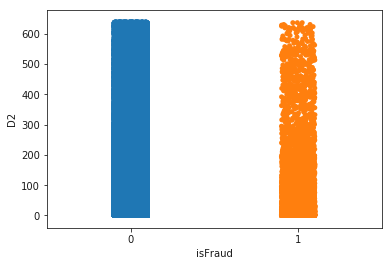

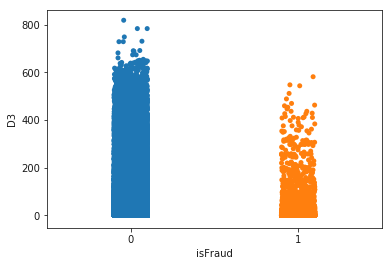

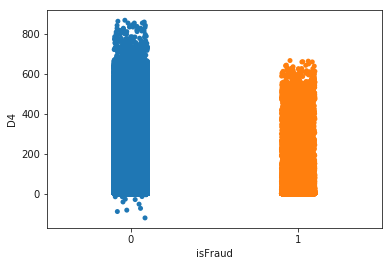

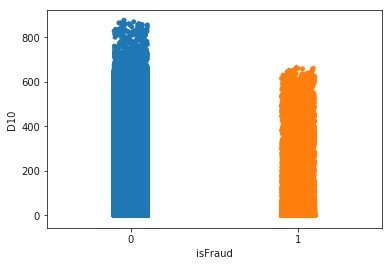

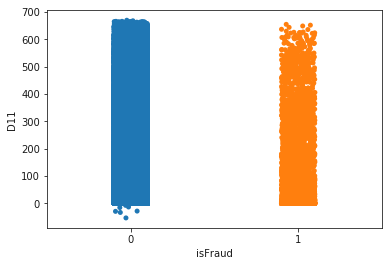

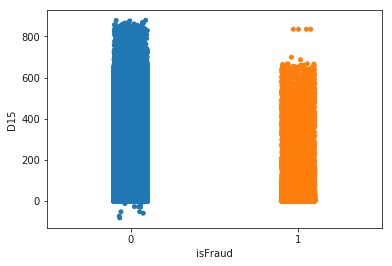

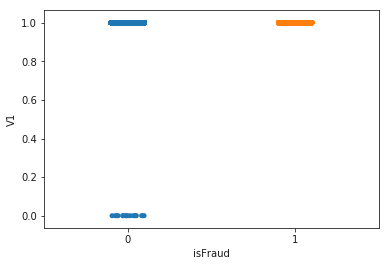

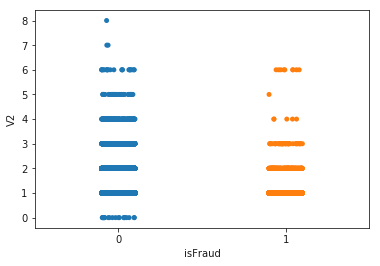

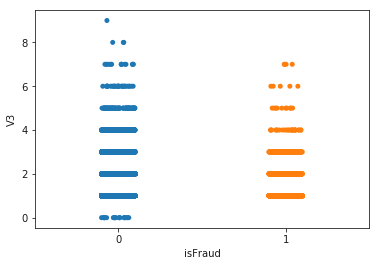

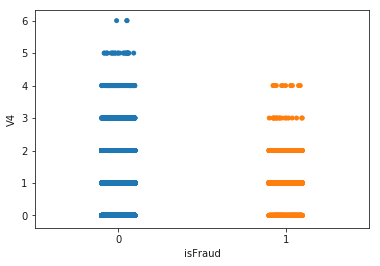

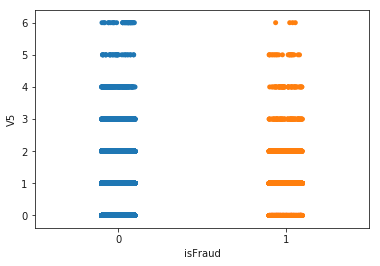

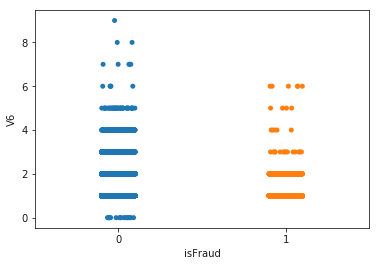

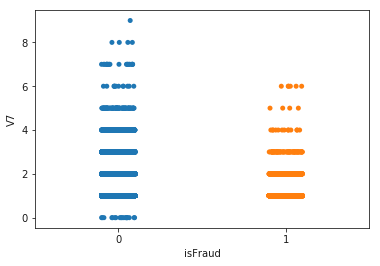

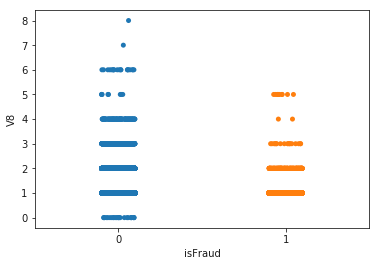

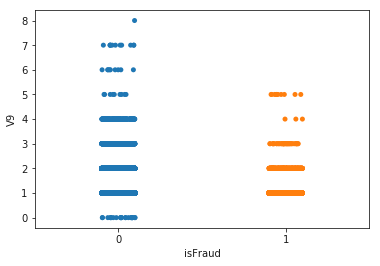

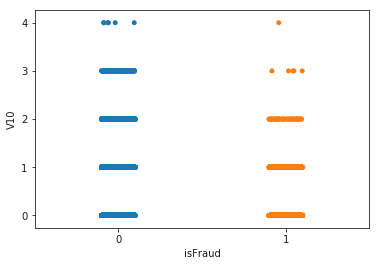

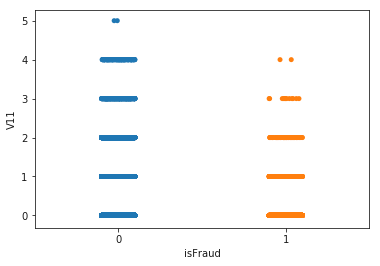

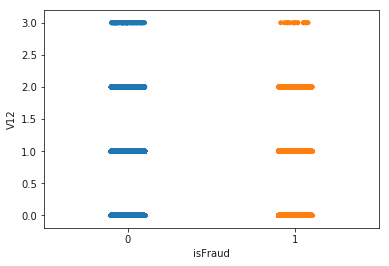

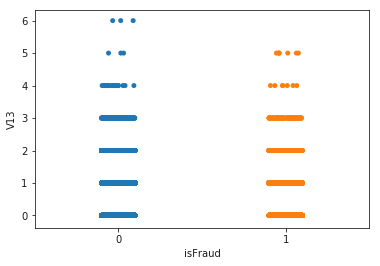

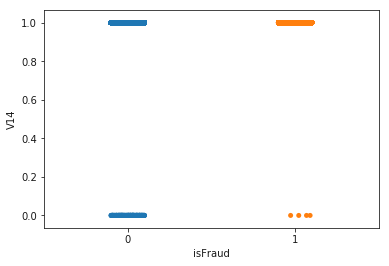

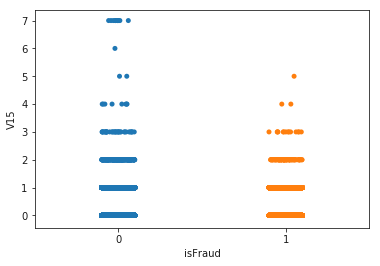

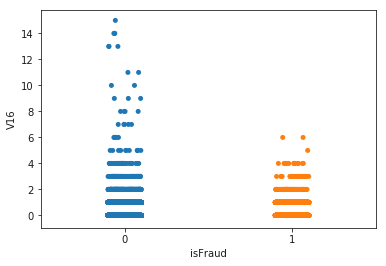

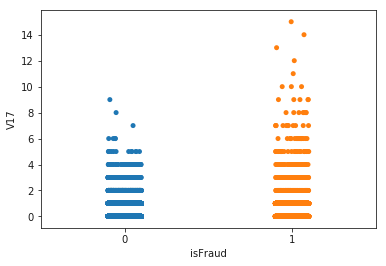

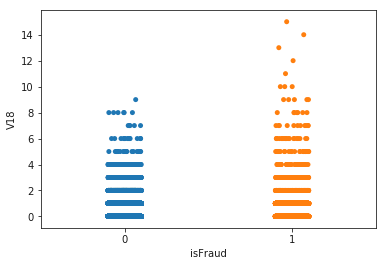

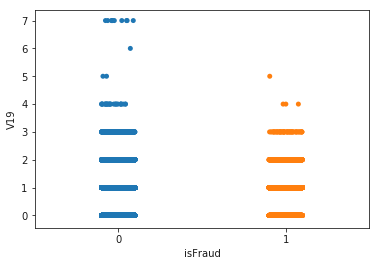

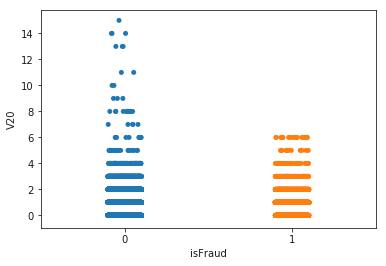

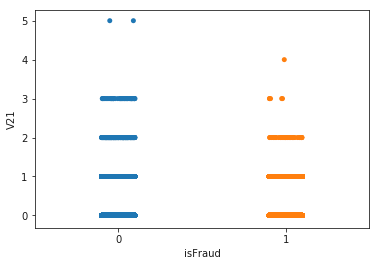

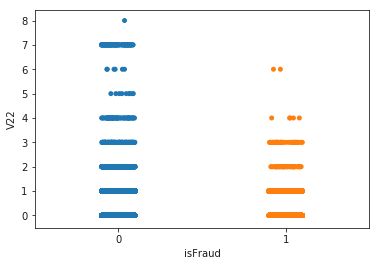

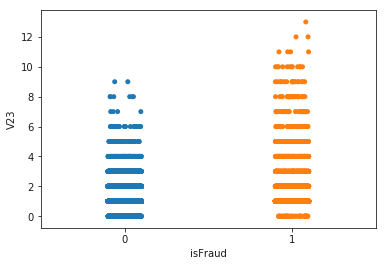

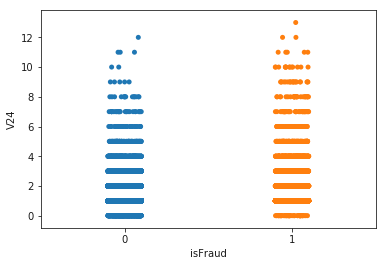

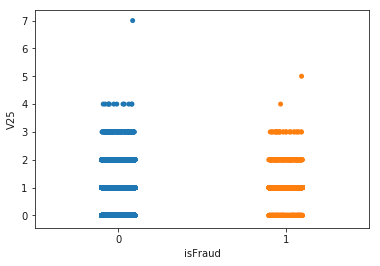

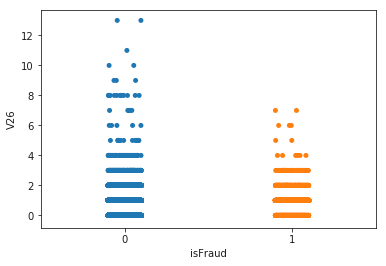

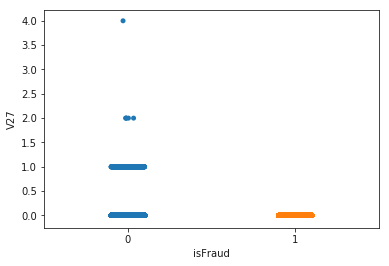

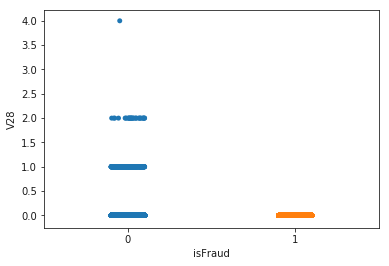

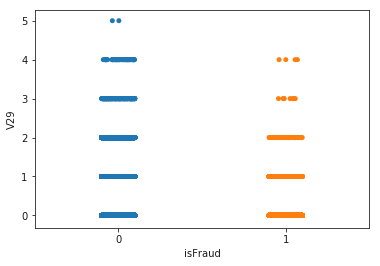

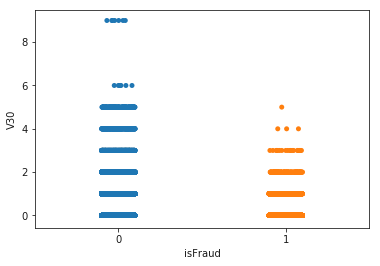

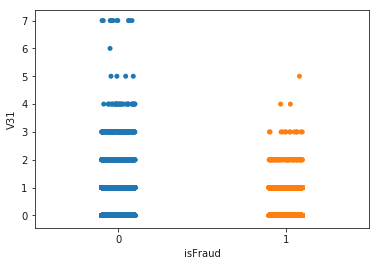

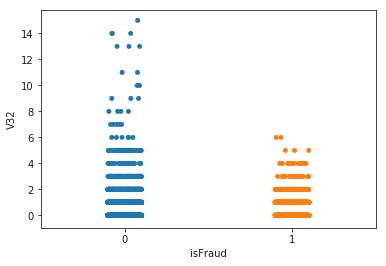

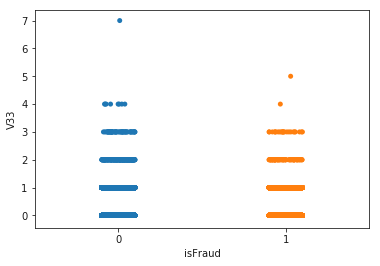

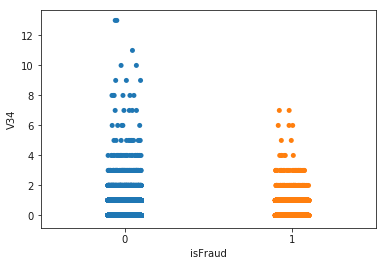

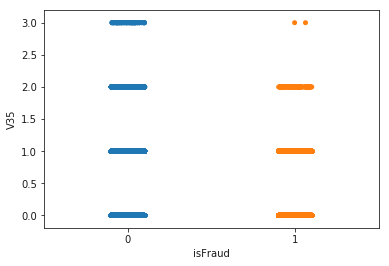

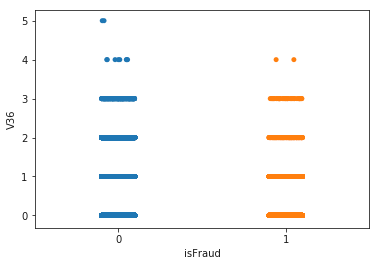

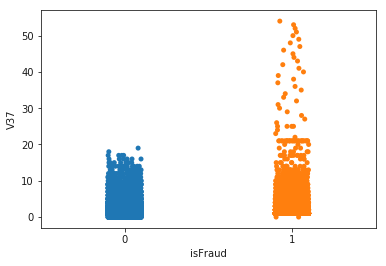

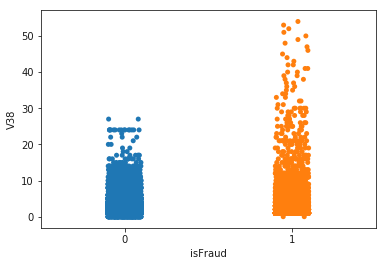

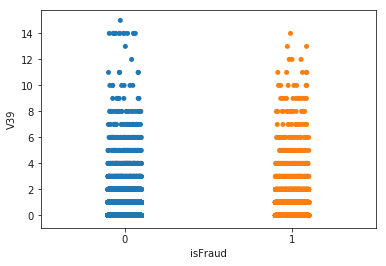

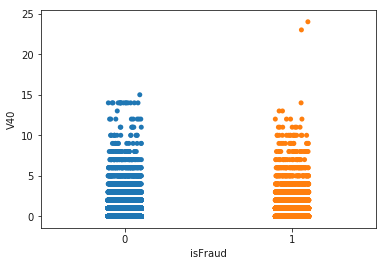

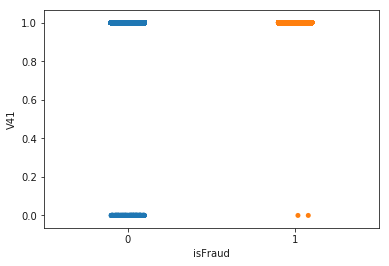

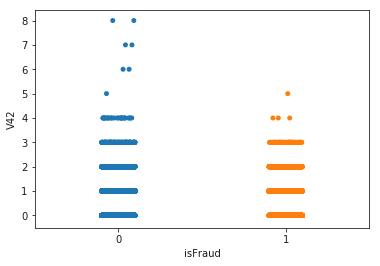

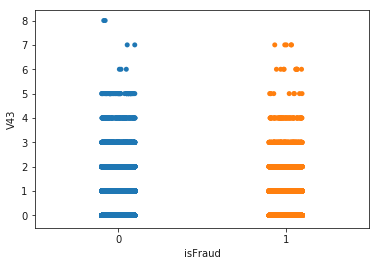

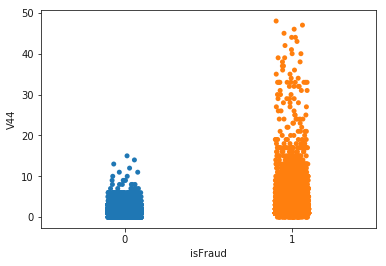

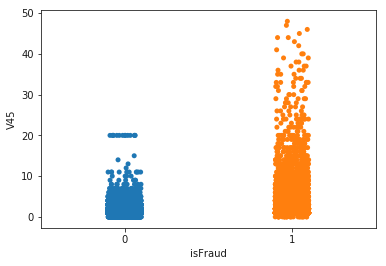

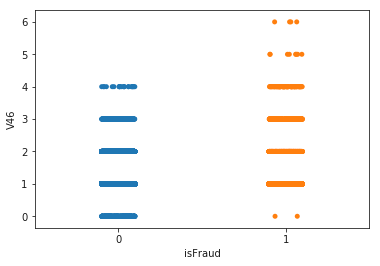

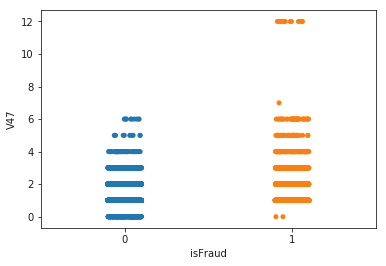

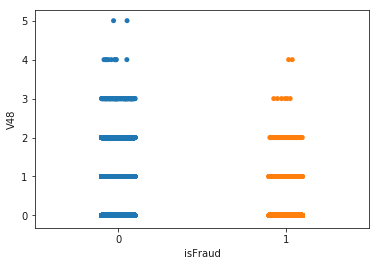

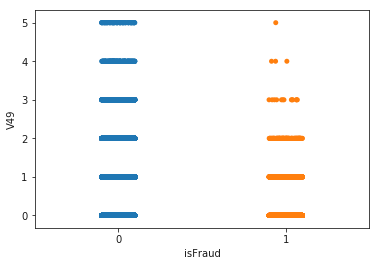

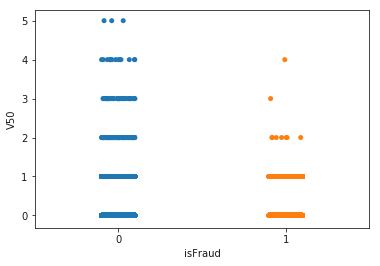

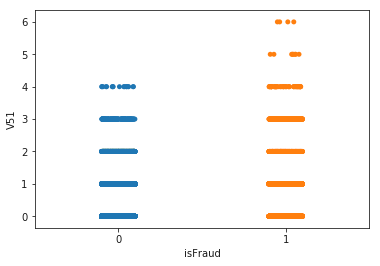

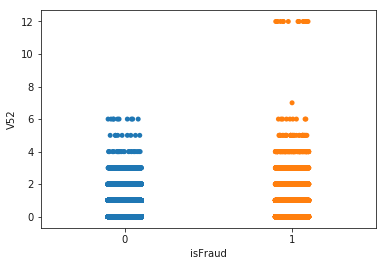

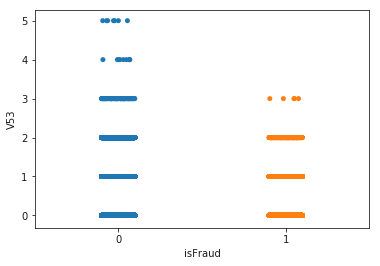

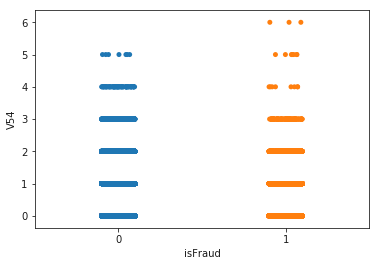

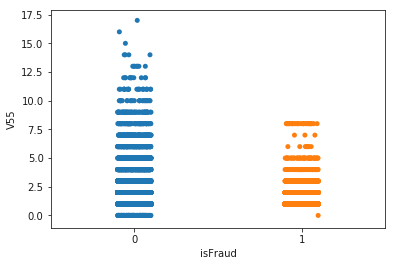

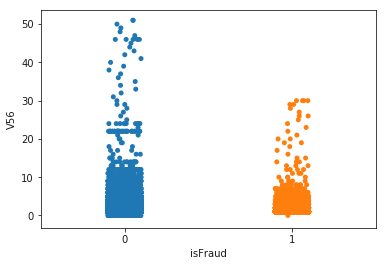

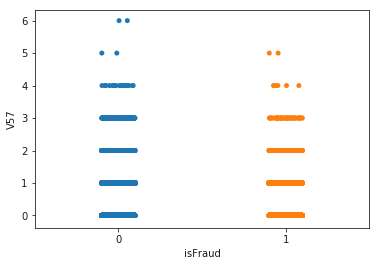

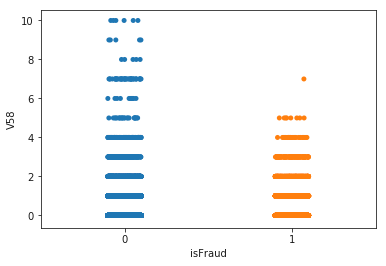

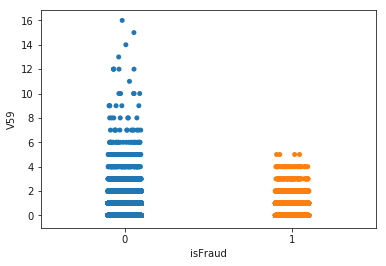

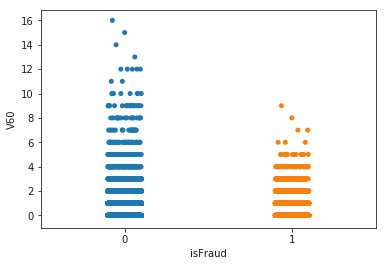

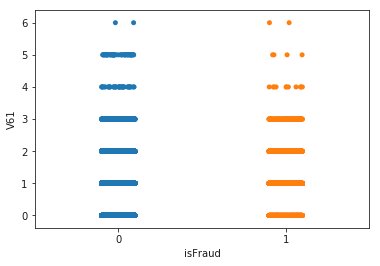

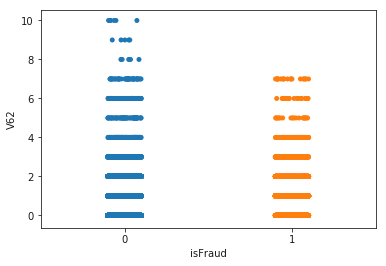

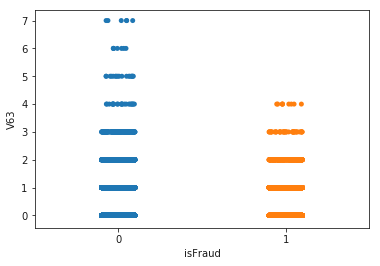

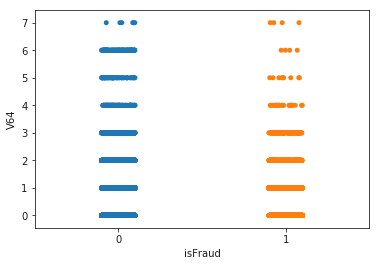

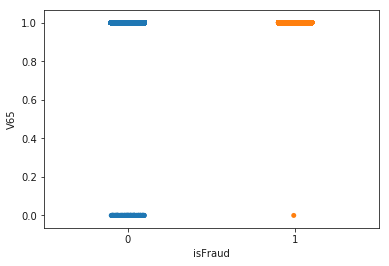

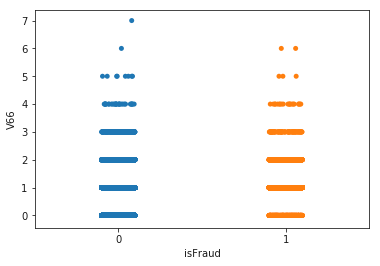

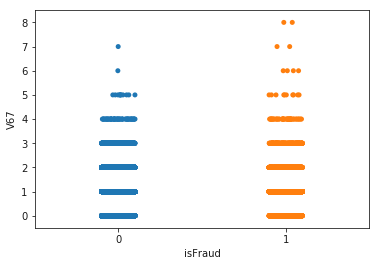

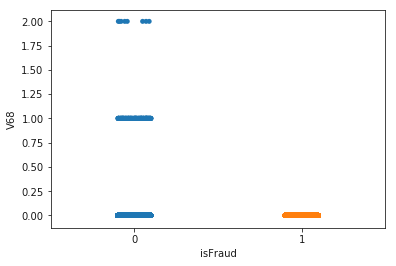

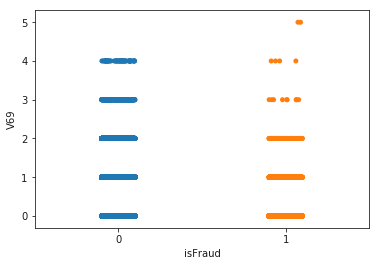

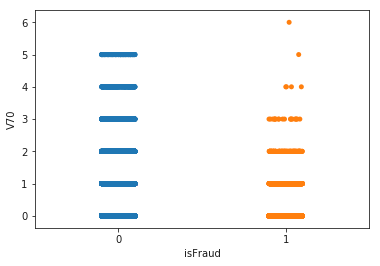

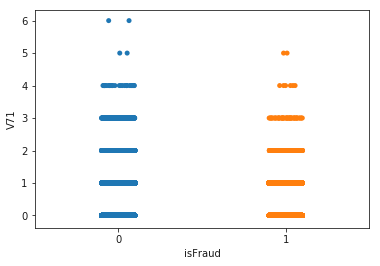

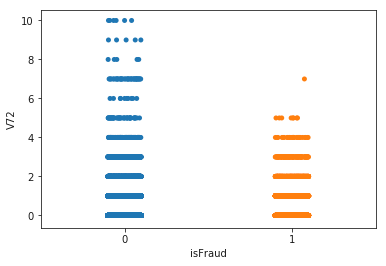

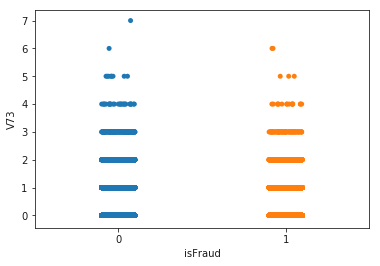

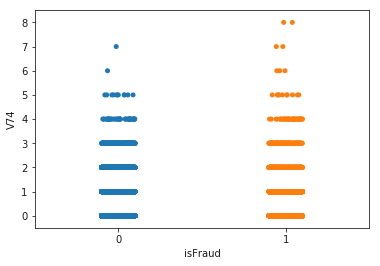

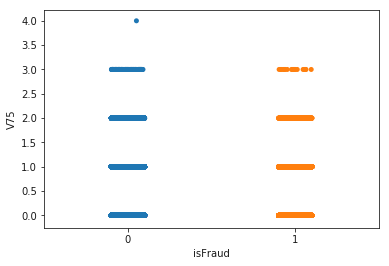

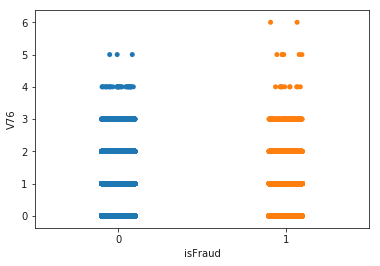

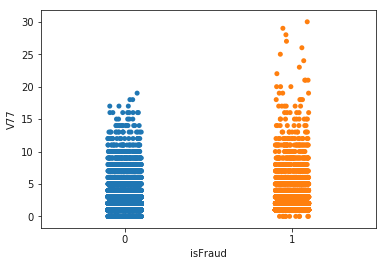

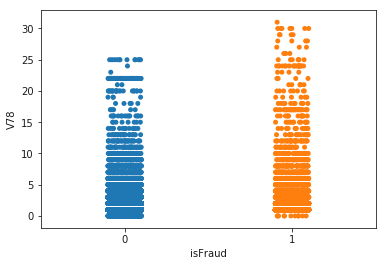

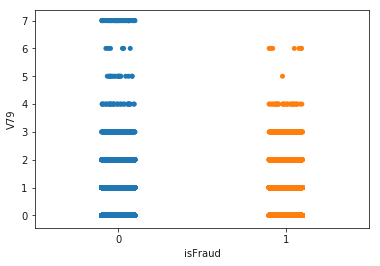

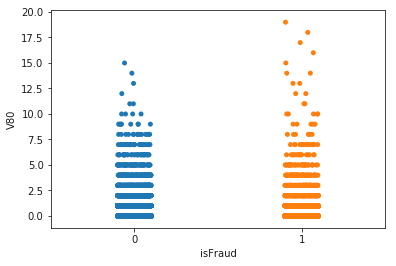

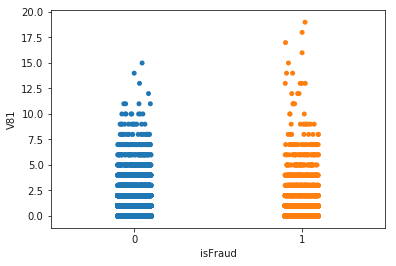

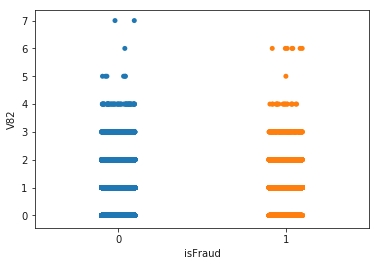

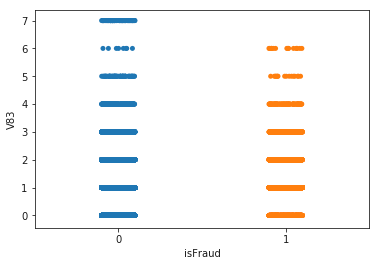

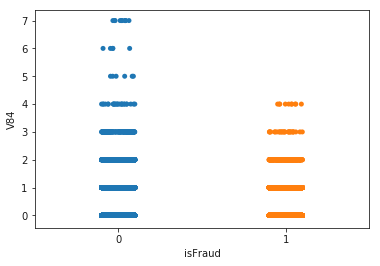

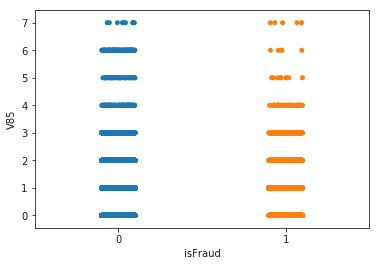

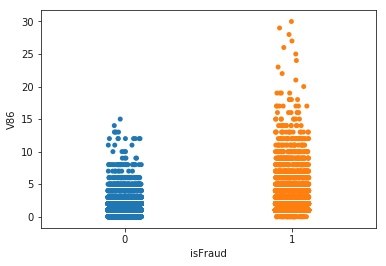

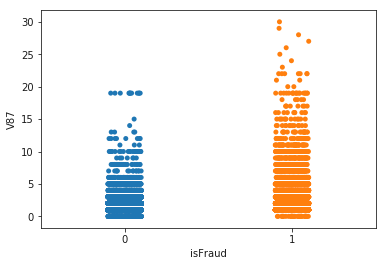

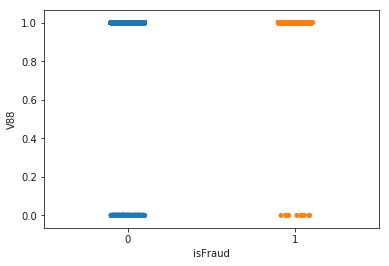

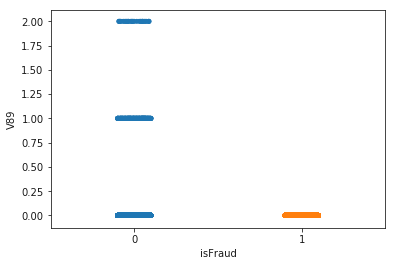

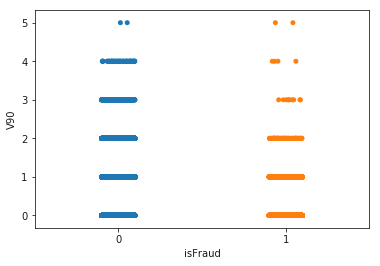

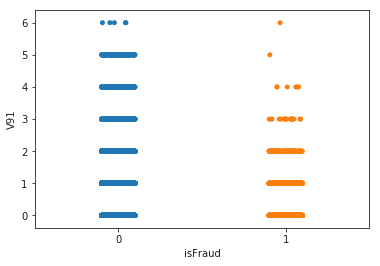

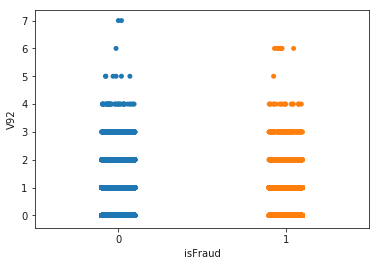

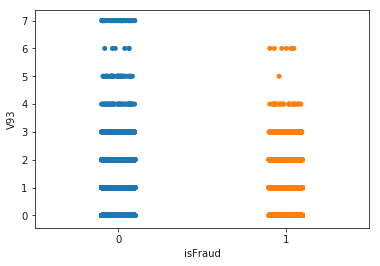

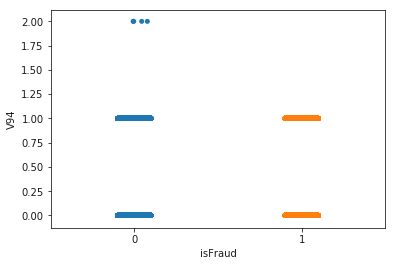

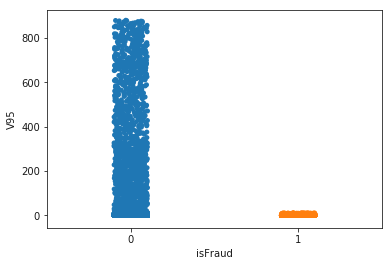

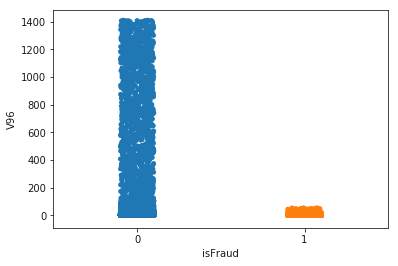

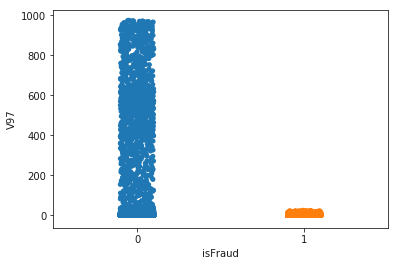

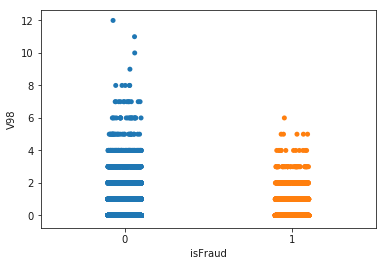

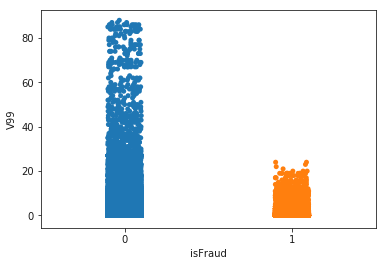

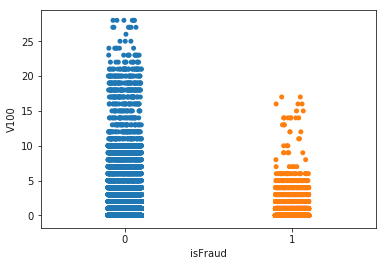

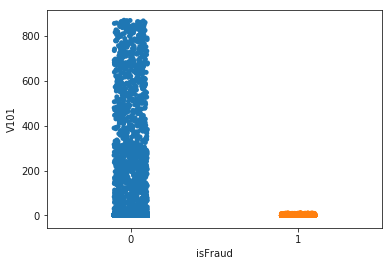

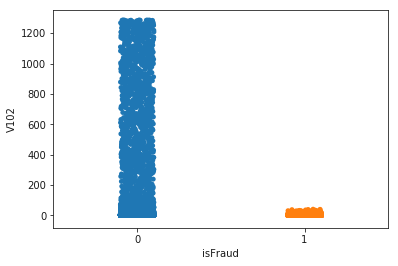

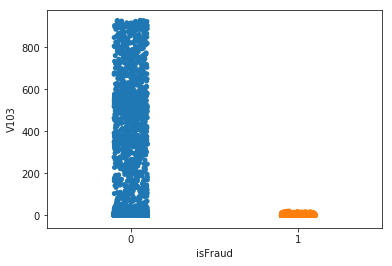

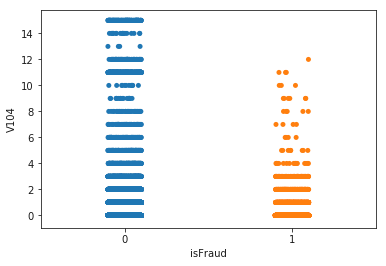

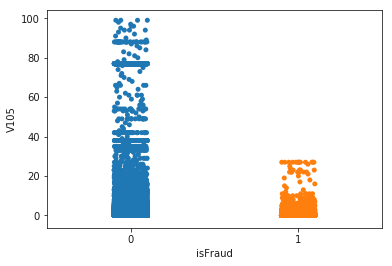

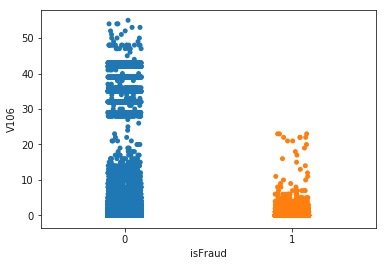

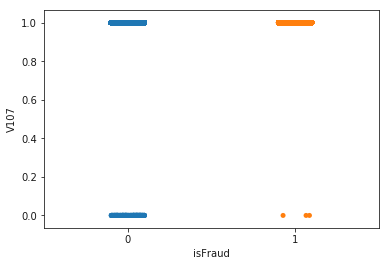

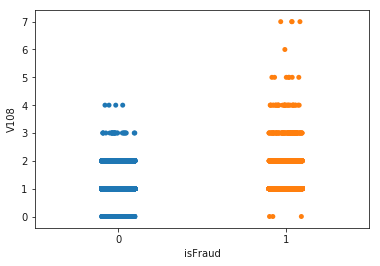

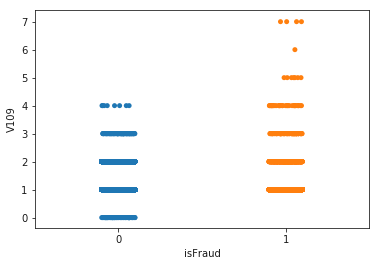

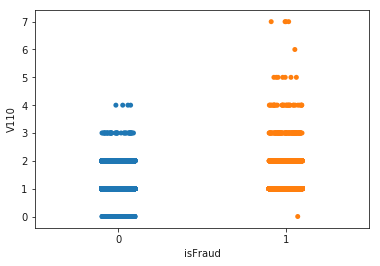

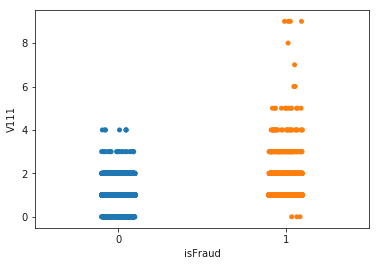

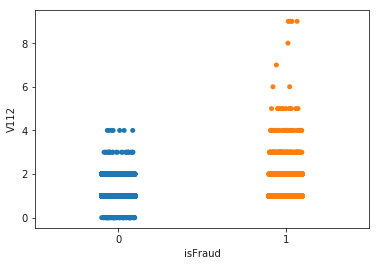

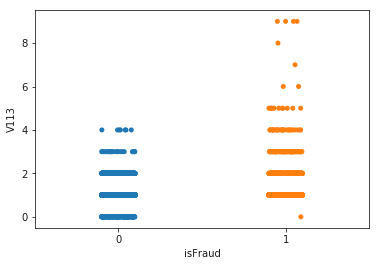

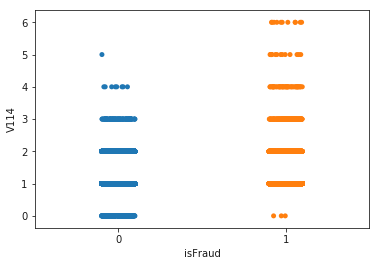

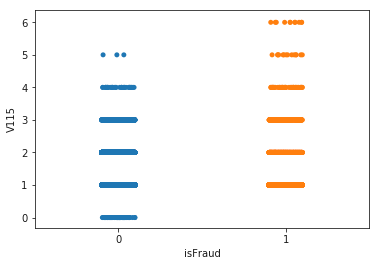

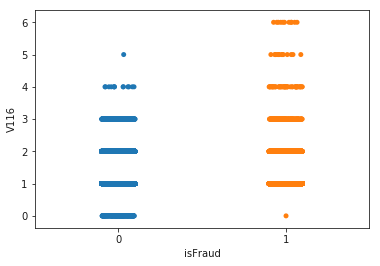

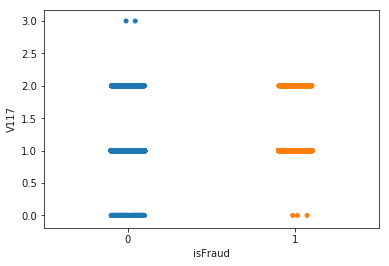

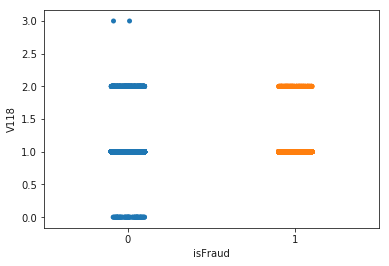

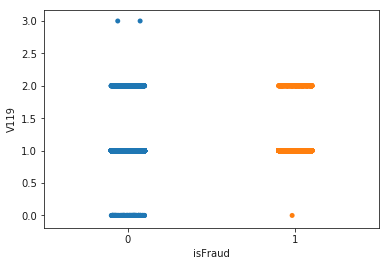

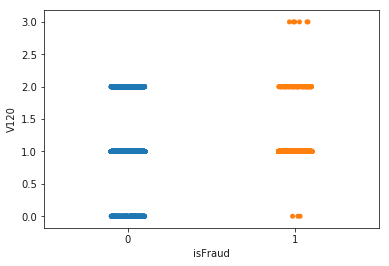

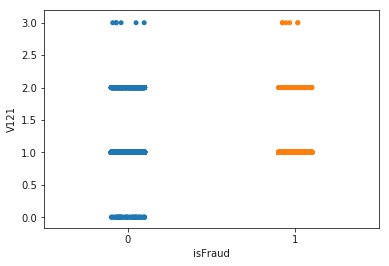

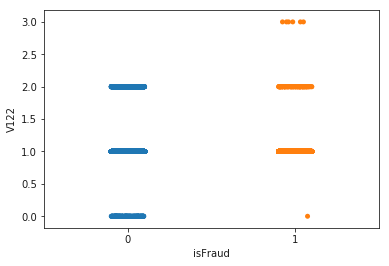

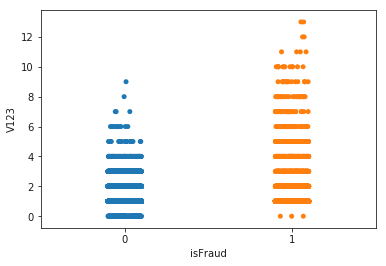

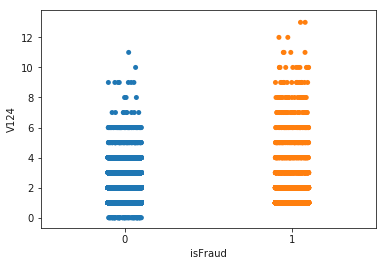

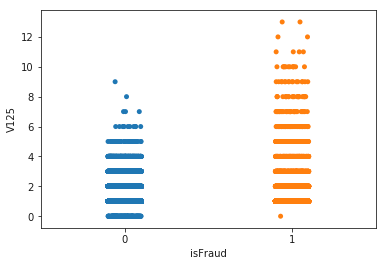

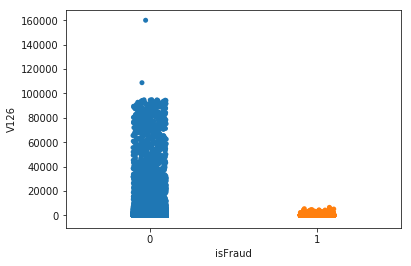

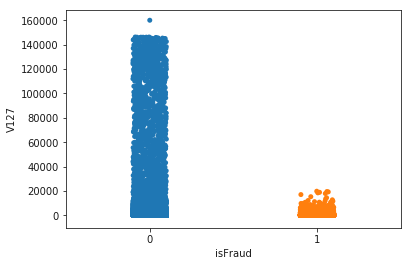

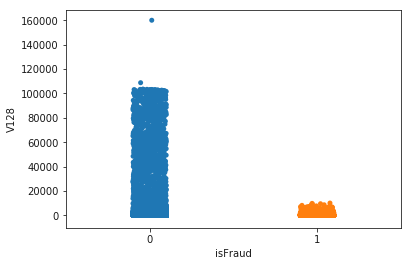

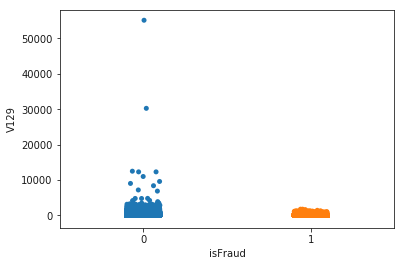

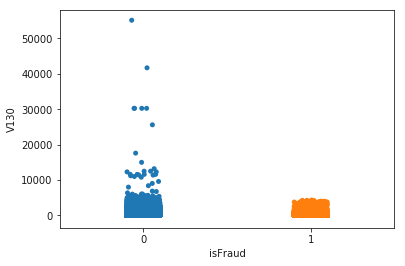

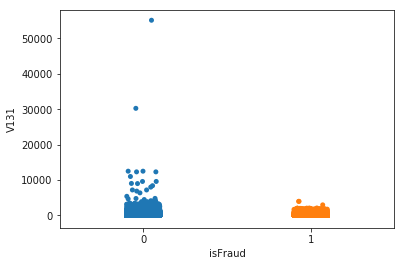

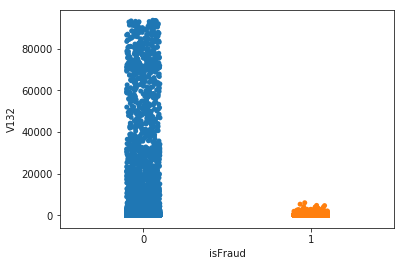

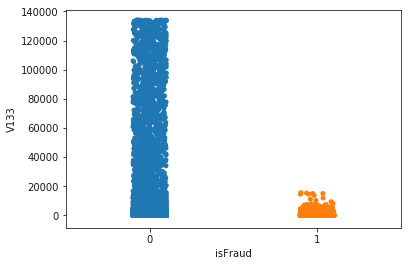

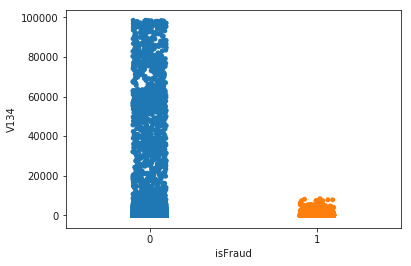

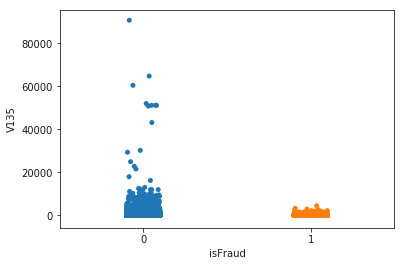

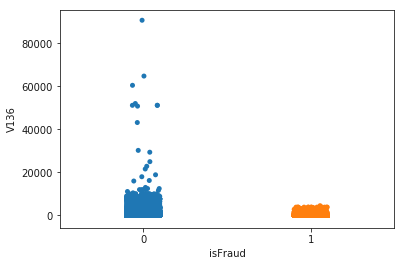

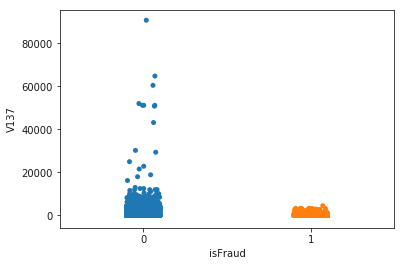

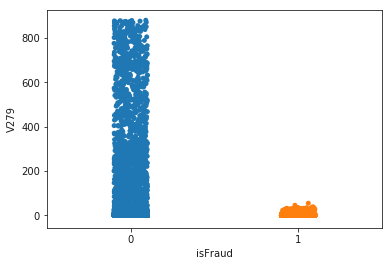

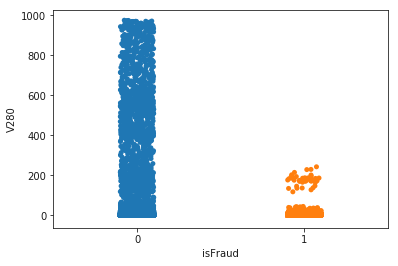

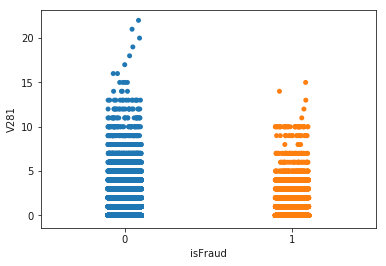

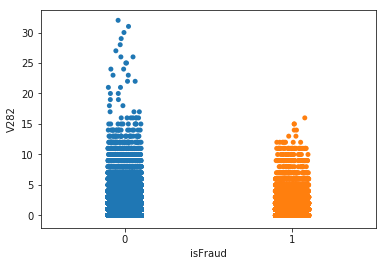

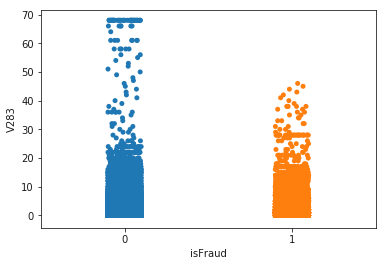

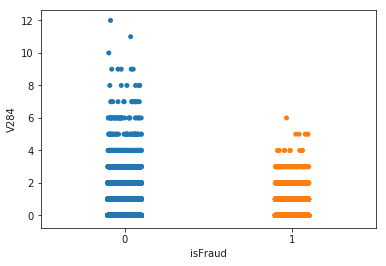

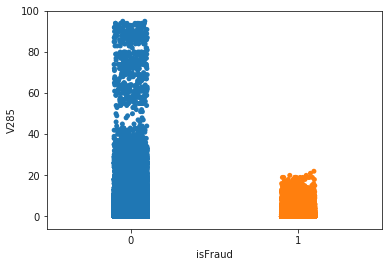

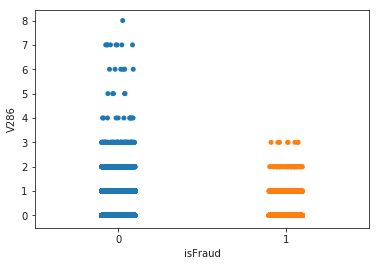

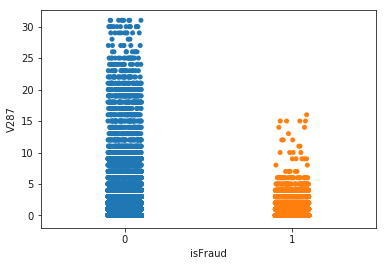

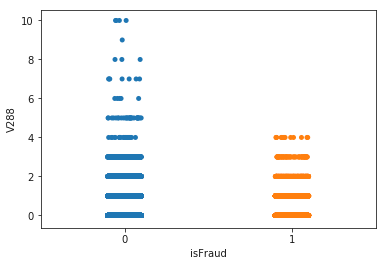

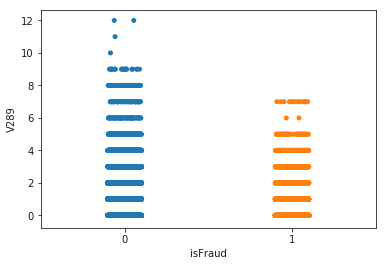

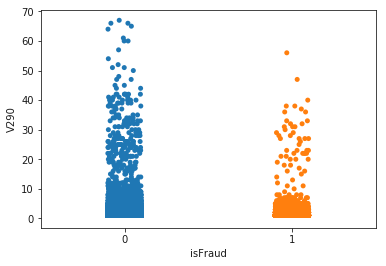

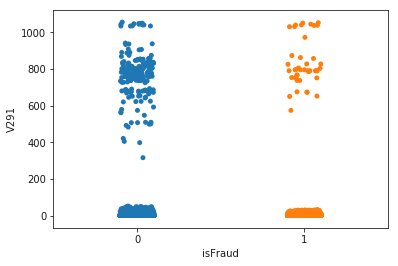

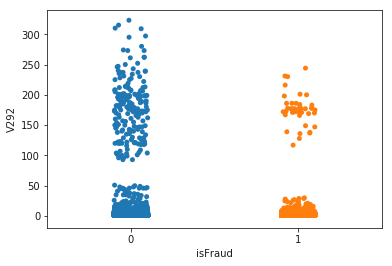

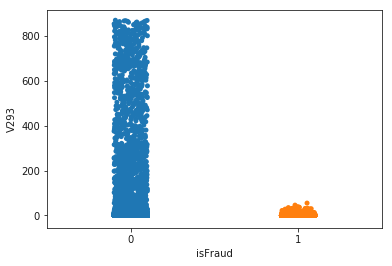

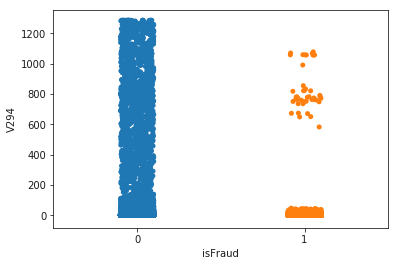

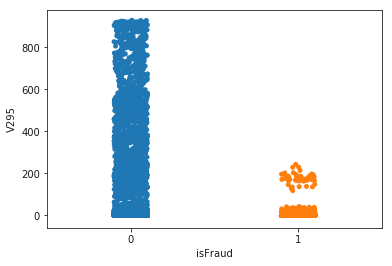

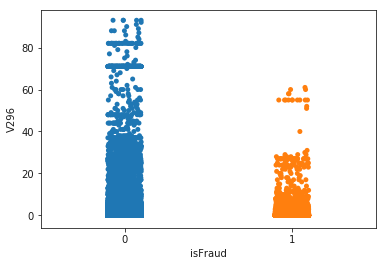

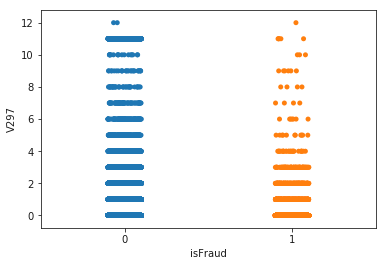

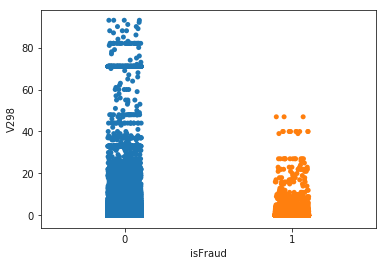

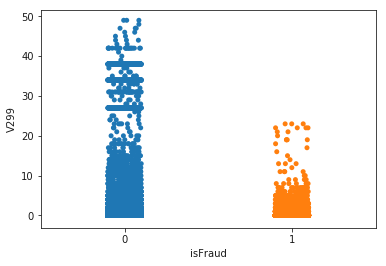

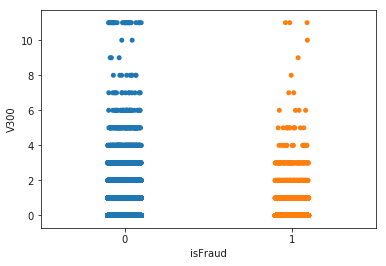

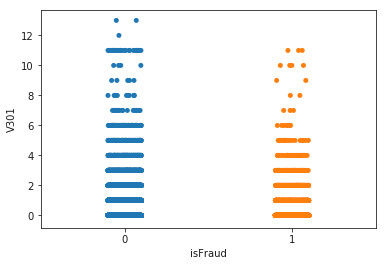

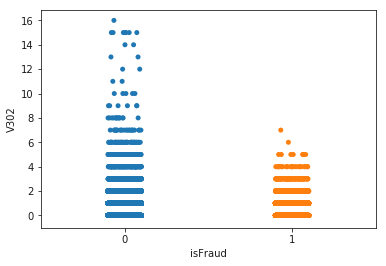

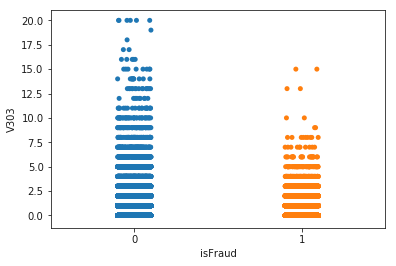

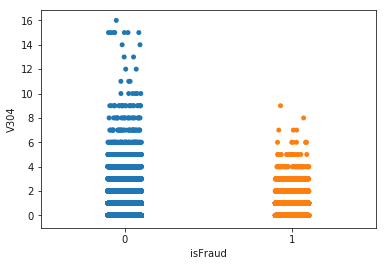

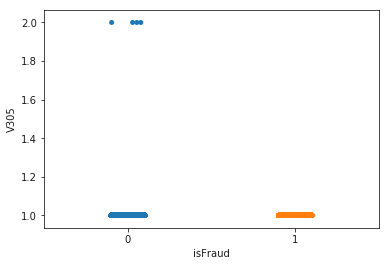

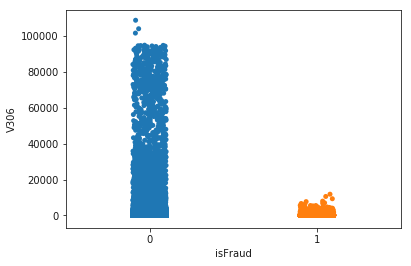

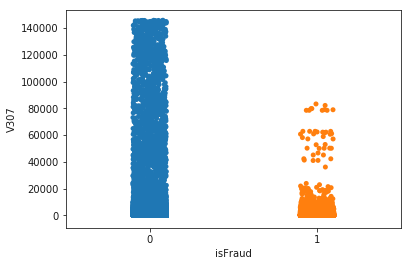

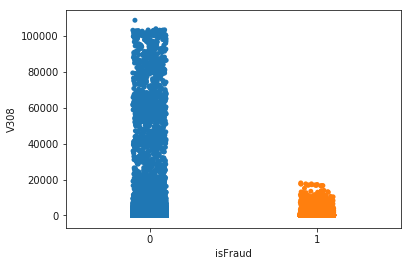

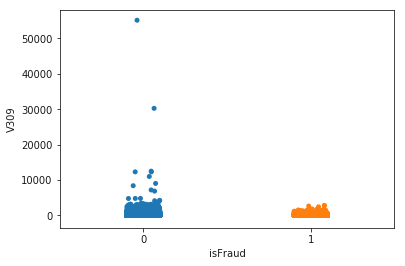

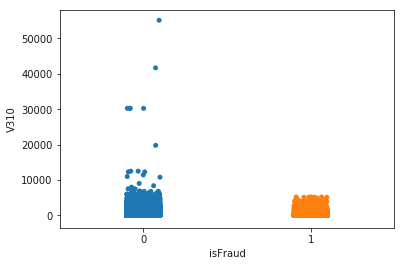

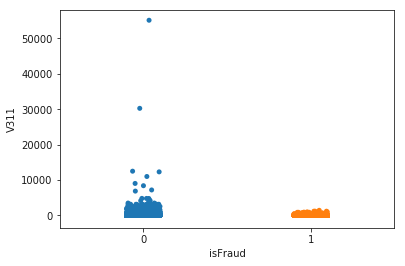

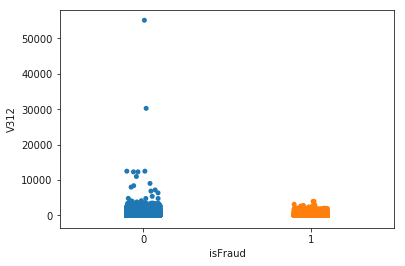

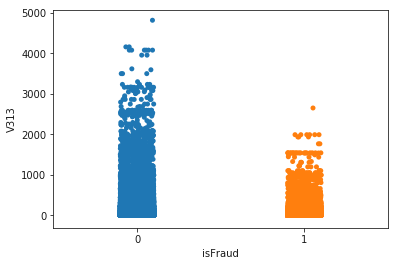

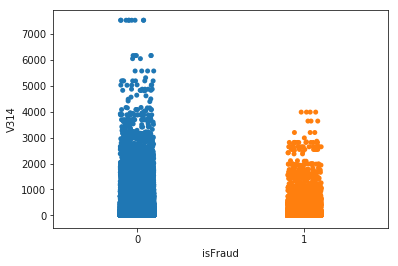

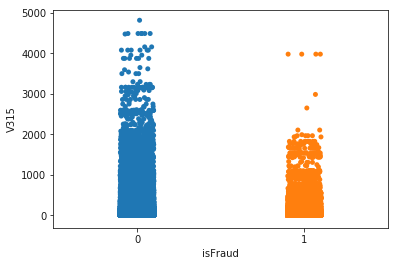

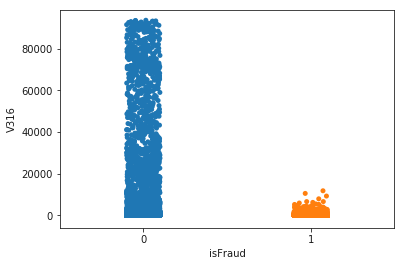

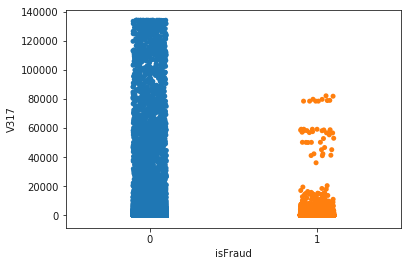

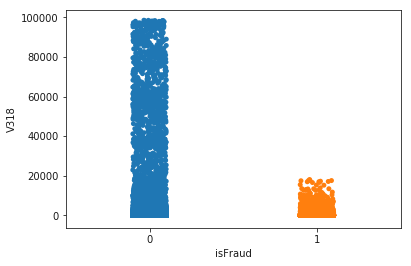

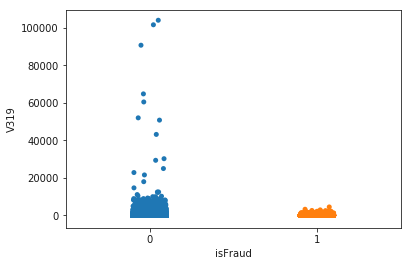

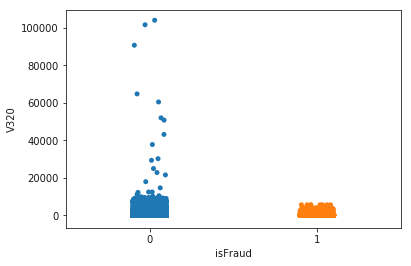

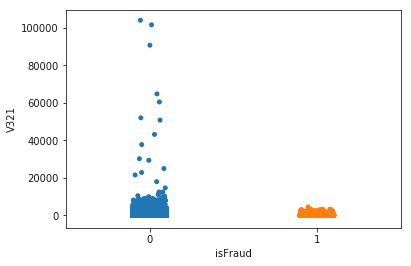

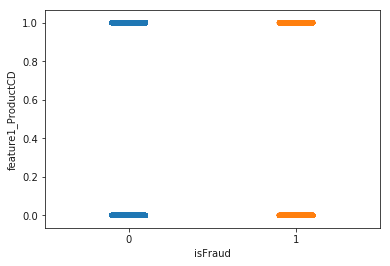

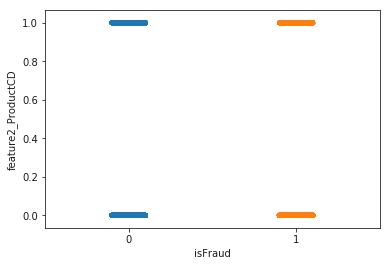

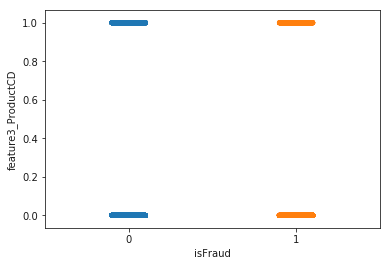

In [124]:
%%time
for col in train.select_dtypes(exclude="object").columns[3:]:
    fig,ax=plt.subplots()
    myfig=sns.stripplot(x="isFraud", y=col, data=train, jitter=True,ax=ax)
    ax.figure.savefig("./plots/stripplot_"+col+".png")

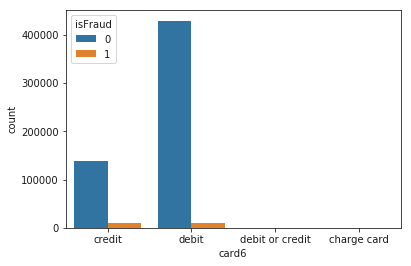

In [125]:
sns.countplot(x="card6",data=train,hue="isFraud")

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


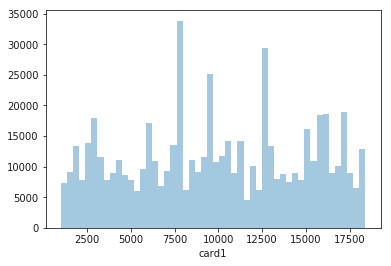

In [126]:
sns.distplot(train[train.card1.notna()]["card1"],hist=True,kde=False)

In [127]:
train.card1.describe()

count    590538.000000
mean       9898.713741
std        4901.165273
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14182.750000
max       18396.000000
Name: card1, dtype: float64

In [128]:
train.card2.describe()

count    581605.000000
mean        362.554968
std         157.793268
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

In [129]:
train.card3.describe()

count    588973.000000
mean        153.194936
std          11.336462
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

In [130]:
train.card5.describe()

count    586279.000000
mean        199.279229
std          41.244132
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

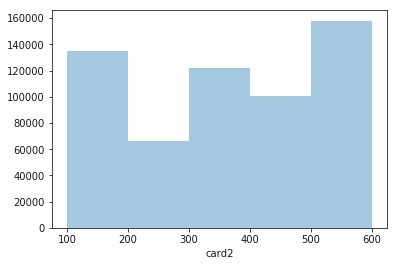

In [131]:
sns.distplot(train[train.card2.notna()]["card2"],kde=False,hist=True,bins=5)

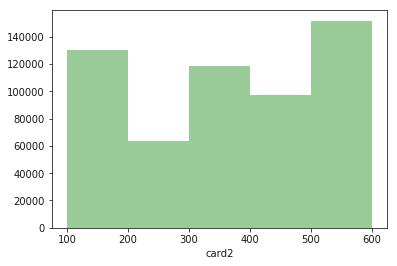

In [132]:
sns.distplot(train[(train.card2.notna())&(train.isFraud==0)]["card2"],kde=False,hist=True,bins=5,color="green")

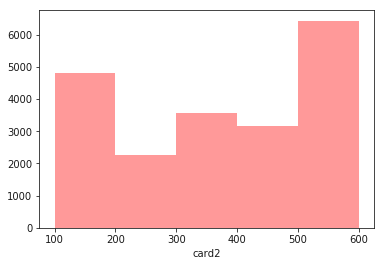

In [133]:
sns.distplot(train[(train.card2.notna())&(train.isFraud==1)]["card2"],kde=False,hist=True,bins=5,color="red")

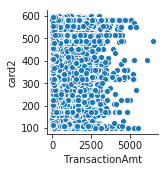

In [134]:
sns.pairplot(data=train,x_vars="TransactionAmt",y_vars="card2")

In [135]:
#Removing Outlier in TransactionAmt
train=train[train.TransactionAmt<20000]

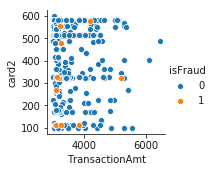

In [136]:
sns.pairplot(hue="isFraud",data=train[train.TransactionAmt>3000],x_vars="TransactionAmt",y_vars="card2")#Outliers need to be handled

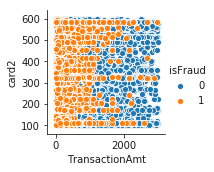

In [137]:
sns.pairplot(hue="isFraud",data=train[train.TransactionAmt<3000],x_vars="TransactionAmt",y_vars="card2")#Outliers need to be handled

In [138]:
train[["TransactionAmt","card2"]].corr()

TransactionAmt     card2
TransactionAmt        1.000000  0.016199
card2                 0.016199  1.000000

In [139]:
#cpy1=train.copy()

In [140]:
train.dropna(subset=["card2"],inplace=True)

In [141]:
null_frame=train.isnull().sum().to_frame().T

In [143]:
temp_list=[]
for col in null_frame:
    if col in ["TransactionID","isFraud"]:
        continue
    elif(null_frame.loc[0,col]<20000):
        temp_list.append(col)

In [144]:
train.dropna(subset=temp_list,inplace=True)

In [145]:
null_frame=train.isnull().sum().to_frame().T

In [146]:
train.addr1.describe()

count    513443.000000
mean        290.787624
std         101.672642
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

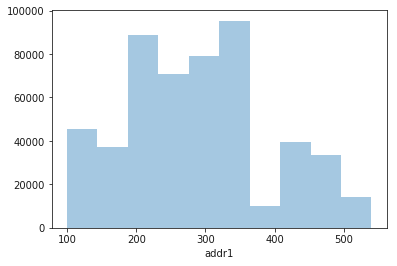

In [147]:
sns.distplot(train[train.addr1.notna()]["addr1"],hist=True,kde=False,bins=10)

In [148]:
train.loc[train.addr1.isna(),"addr1"]=train.addr1.median()

In [149]:
#train.addr1.fillna(train.addr1.median,inplace=True)

In [150]:
cpy1=train.loc[:, train.columns != "addr2"].copy()

In [151]:
#train.drop(columns=["addr2"],inplace=True)

In [152]:
train=cpy1.loc[:, cpy1.columns != "addr2"].copy()

In [154]:
#train.loc[train.dist1.isna(),"dist1"]=0

In [155]:
#train.dist1.fillna(0,inplace=True)

In [156]:
cpy1=train.copy()

In [158]:
#cpy1.dist1=[0 if x<=28 else 1 for x in cpy1.dist1]

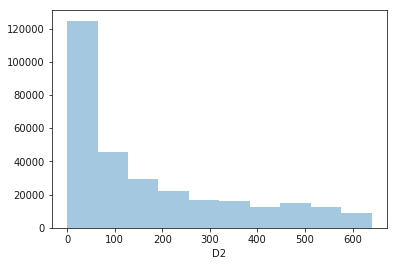

In [159]:
sns.distplot(cpy1[cpy1.D2.notna()]["D2"],hist=True,kde=False,bins=10)

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


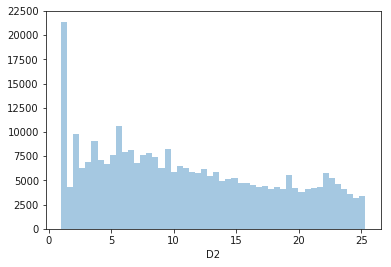

In [160]:
sns.distplot(np.power(cpy1[cpy1.D2.notna()]["D2"]+1,0.5),hist=True,kde=False)

In [161]:
#train.D2.fillna(train.D2.median,inplace=True)
cpy1.loc[cpy1.D2.isna(),"D2"]=cpy1.D2.median()

In [162]:
#train.P_emaildomain.fillna("gmail.com",inplace=True)
cpy1.loc[cpy1.P_emaildomain.isna(),"P_emaildomain"]="gmail.com"

In [163]:
cpy1.D3.describe()

count    321751.000000
mean         28.401257
std          62.535416
min           0.000000
25%           1.000000
50%           8.000000
75%          27.000000
max         819.000000
Name: D3, dtype: float64

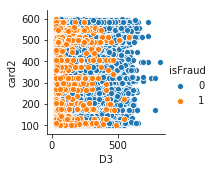

In [164]:
sns.pairplot(hue="isFraud",data=cpy1[cpy1.D3>27],x_vars="D3",y_vars="card2")#Outliers need to be handled

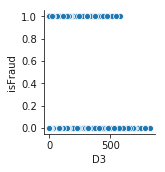

In [165]:
sns.pairplot(data=cpy1,x_vars="D3",y_vars="isFraud")#Outliers need to be handled

In [166]:
train=cpy1.copy()

In [167]:
train["Feature1_D3"]=[1 if x>600 else 0 for x in train.D3]

In [168]:
#train.drop(columns=["D3"],inplace=True)
cpy1=train.loc[:, train.columns != "D3"].copy()

In [169]:
cpy1.D4.describe()

count    412333.000000
mean        140.542246
std         191.401201
min        -122.000000
25%           0.000000
50%          26.000000
75%         255.000000
max         869.000000
Name: D4, dtype: float64

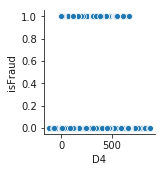

In [170]:
sns.pairplot(data=cpy1,x_vars="D4",y_vars="isFraud")#Outliers need to be handled

In [171]:
#train.D4.fillna(train.D4.median(),inplace=True)
cpy1.loc[cpy1.D4.isna(),"D4"]=cpy1.D4.median()

In [172]:
train=cpy1.copy()

In [173]:
train["feature1_D4"]=[1 if x<0 else 0 for x in train.D4]

In [174]:
train["feature2_D4"]=[1 if x<600 else 0 for x in train.D4]

In [176]:
#sns.pairplot(data=train[train.D5>630],x_vars="D5",y_vars="isFraud")#Outliers need to be handled

In [178]:
#sns.pairplot(data=train,x_vars="D5",y_vars="isFraud")#Outliers need to be handled

In [180]:
#train.D5.fillna(train.D5.median(),inplace=True)

In [181]:
#train["feature1_D5"]=[1 if x>630 else 0 for x in train.D5]

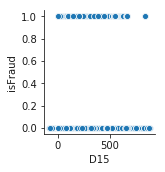

In [182]:
sns.pairplot(data=train,x_vars="D15",y_vars="isFraud")#Outliers need to be handled

In [183]:
train.D10.fillna(train.D10.median(),inplace=True)
train["feature1_D10"]=[1 if x>630 else 0 for x in train.D10]
train.D11.fillna(train.D11.median(),inplace=True)
train["feature1_D11"]=[1 if x<0 else 0 for x in train.D11]
train.D15.fillna(train.D15.median(),inplace=True)
train["feature1_D15"]=[1 if x<0 else 0 for x in train.D15]

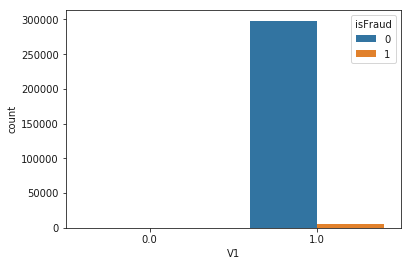

In [184]:
sns.countplot(x="V1",data=train,hue="isFraud")

In [185]:
for col in train.select_dtypes(include="object").columns:
    train.loc[train[col].isna(),col]=train[col].mode()[0]

In [186]:
for col in train.select_dtypes(exclude="object").columns:
    train.loc[train[col].isna(),col]=train[col].median()

In [187]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [188]:
#sns.countplot(data=train,x="DeviceType",hue="isFraud")

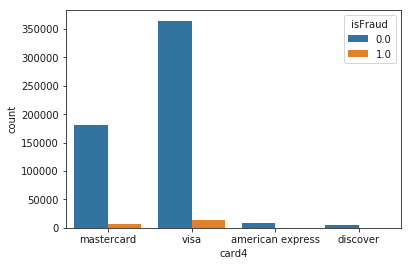

In [189]:
sns.countplot(data=train,x="card4",hue="isFraud")

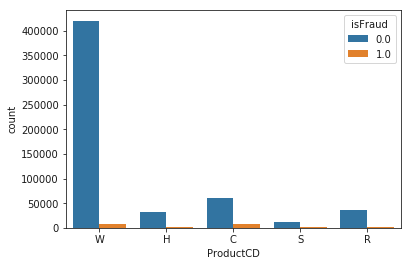

In [190]:
sns.countplot(data=train,x="ProductCD",hue="isFraud")

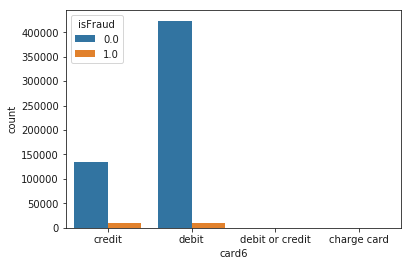

In [191]:
sns.countplot(data=train,x="card6",hue="isFraud")

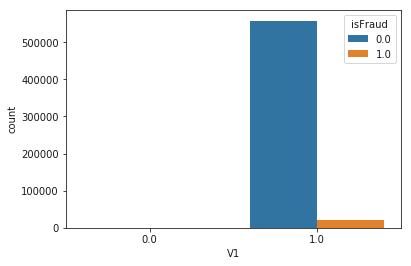

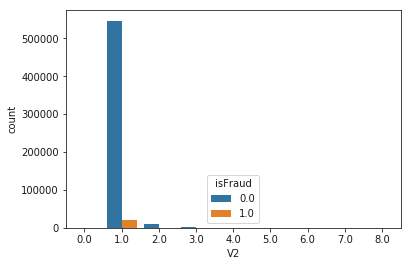

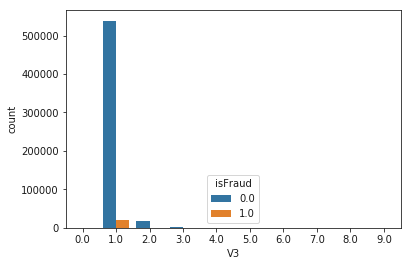

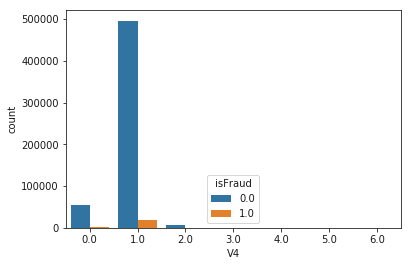

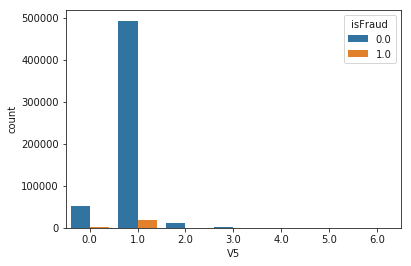

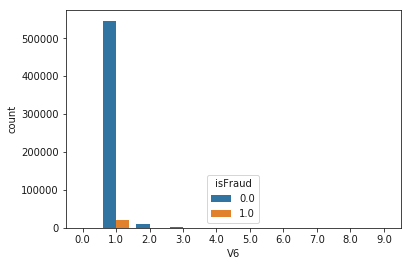

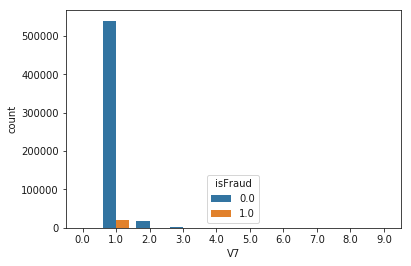

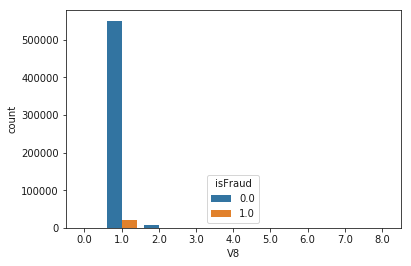

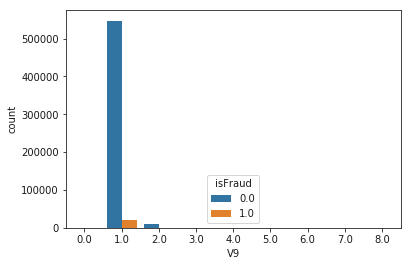

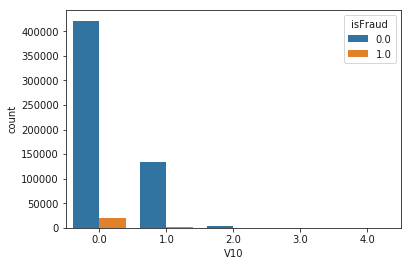

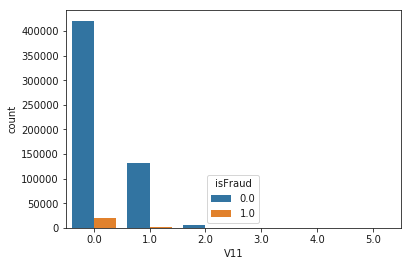

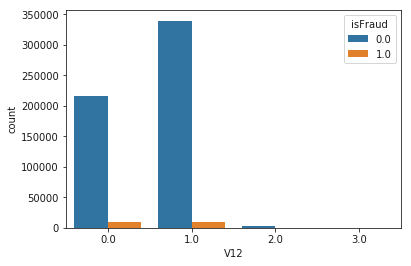

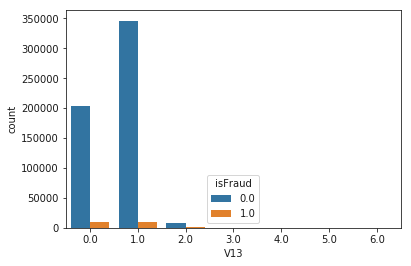

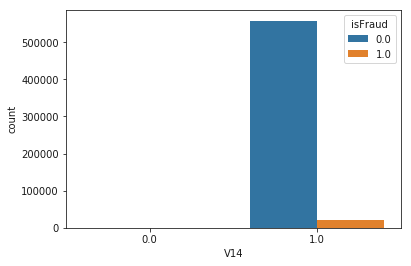

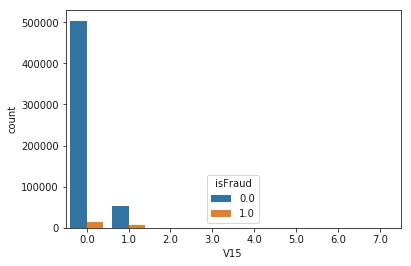

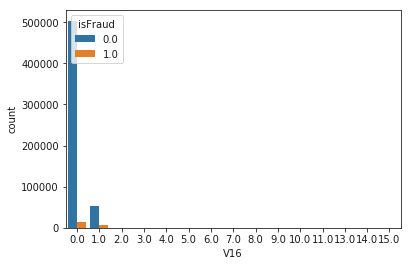

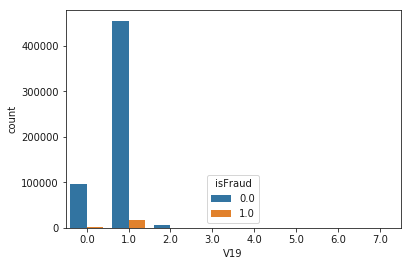

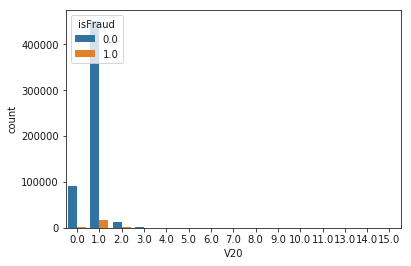

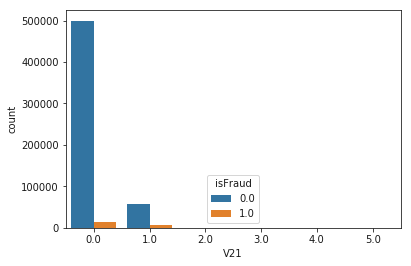

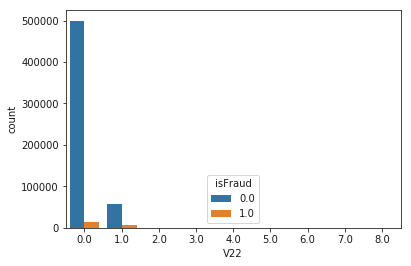

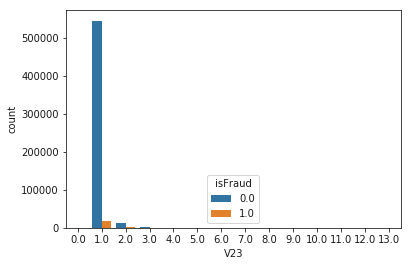

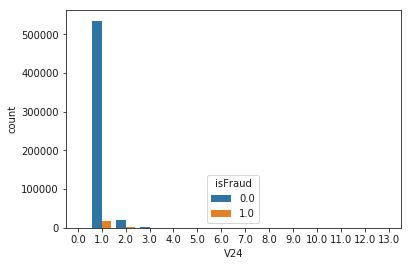

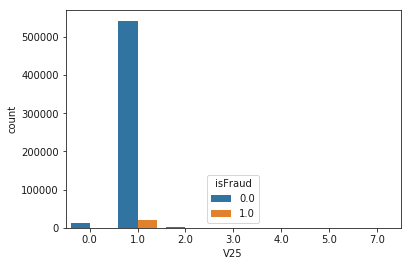

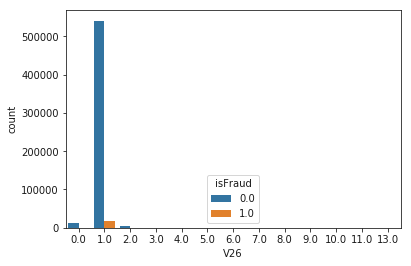

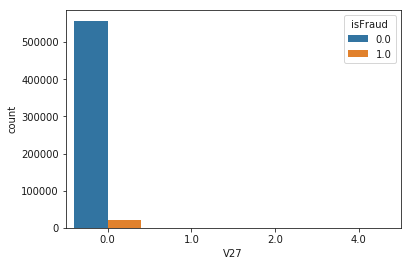

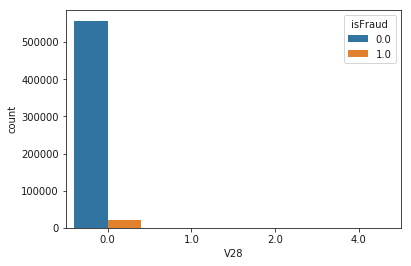

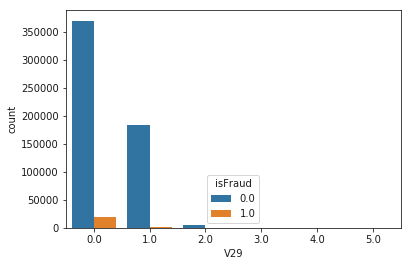

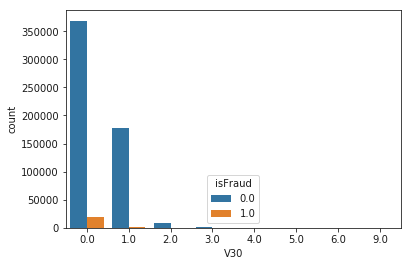

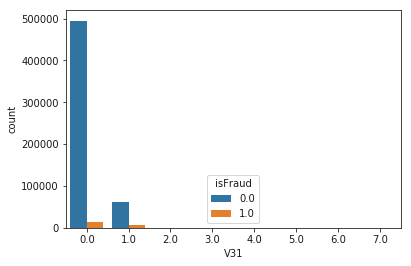

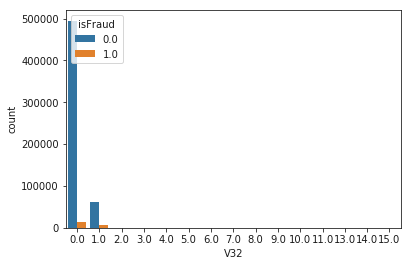

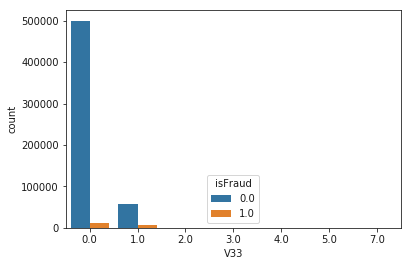

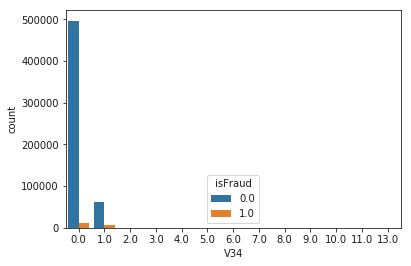

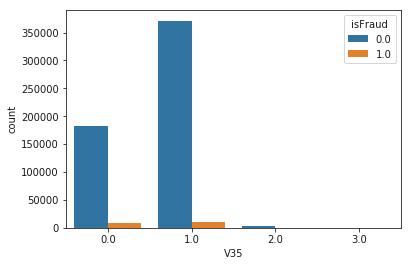

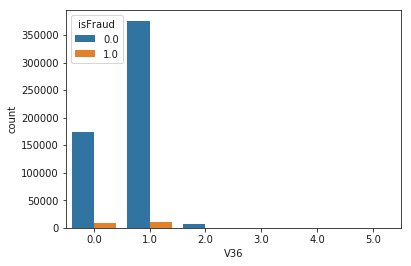

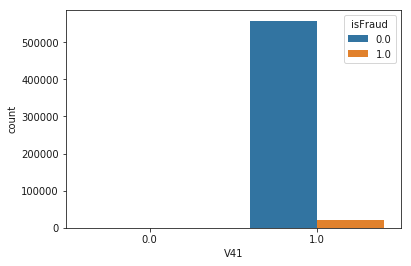

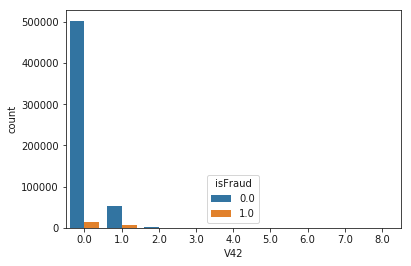

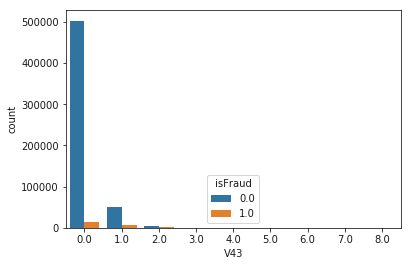

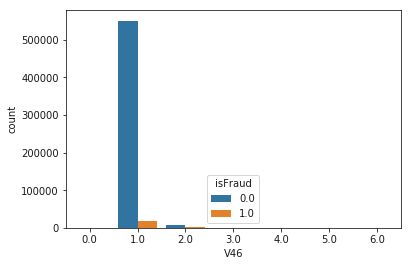

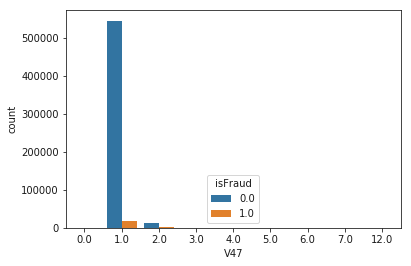

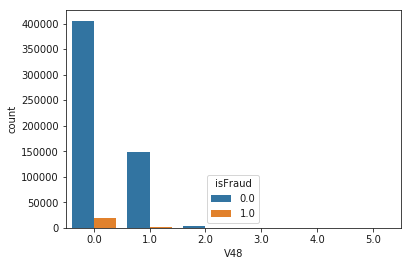

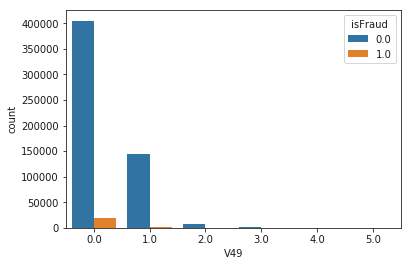

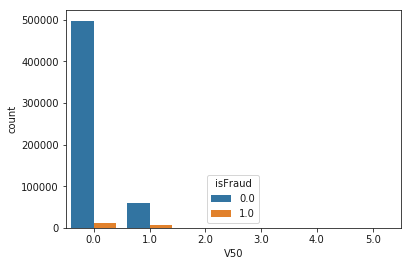

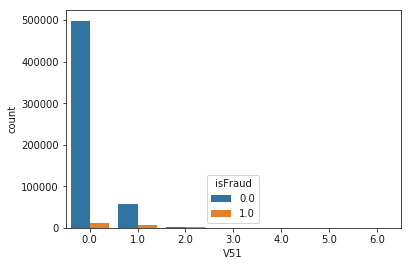

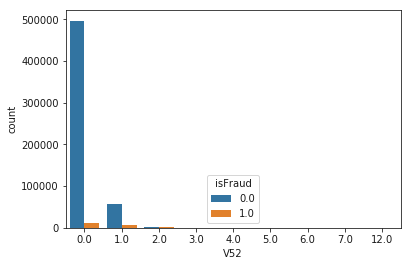

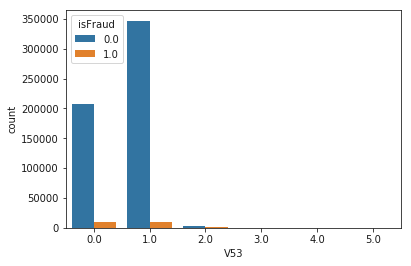

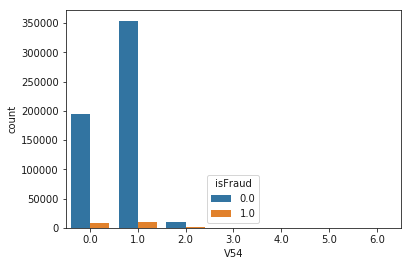

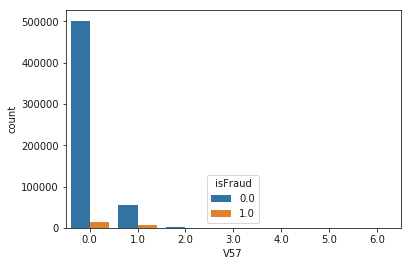

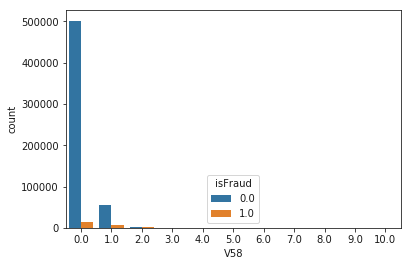

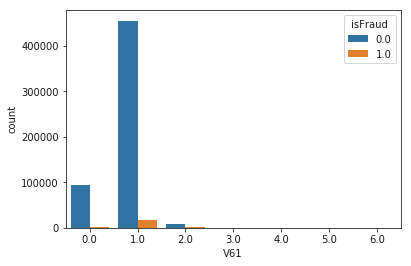

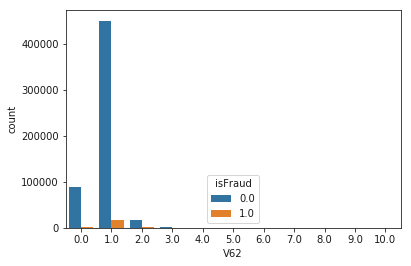

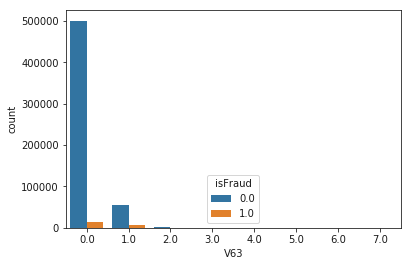

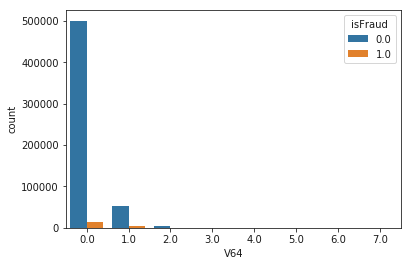

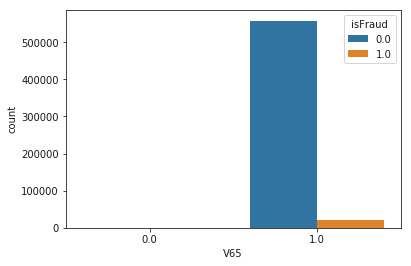

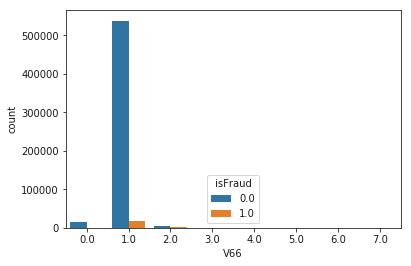

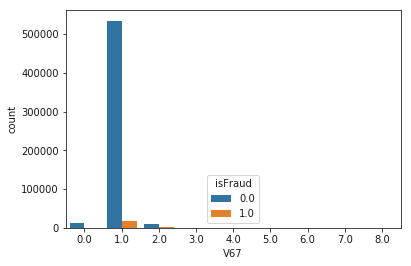

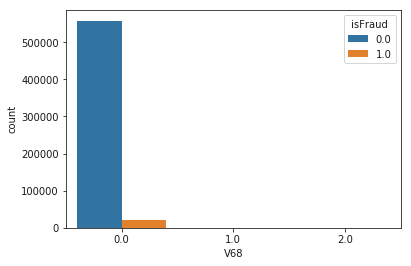

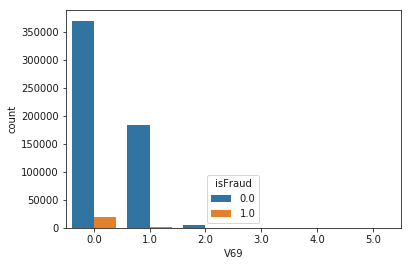

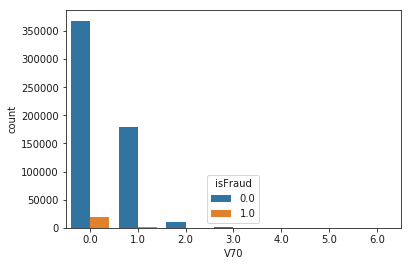

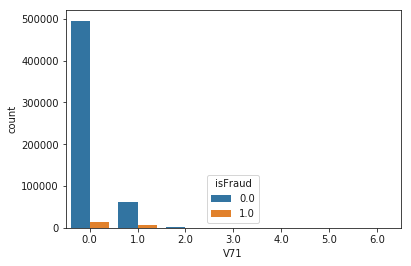

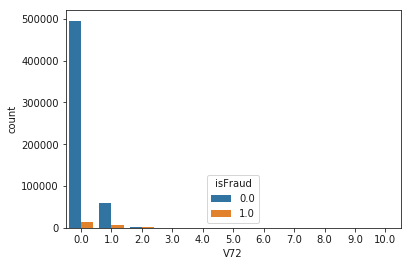

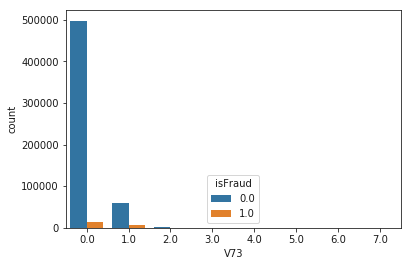

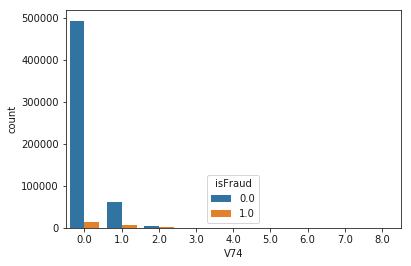

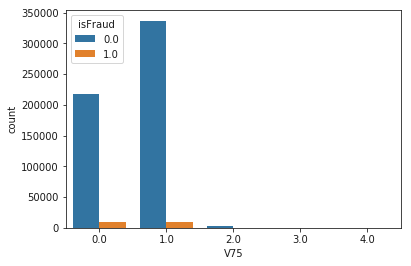

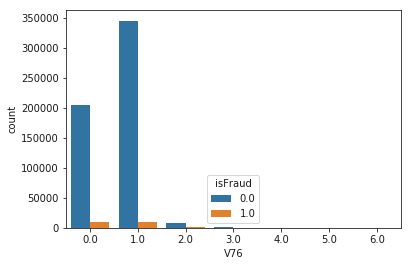

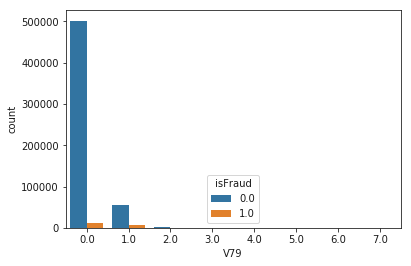

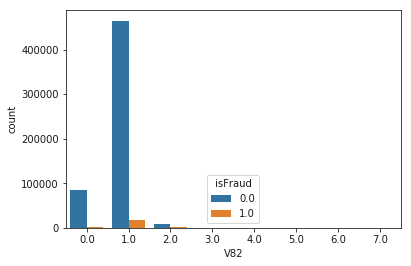

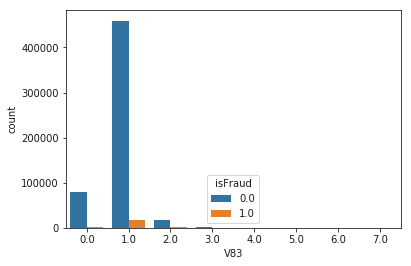

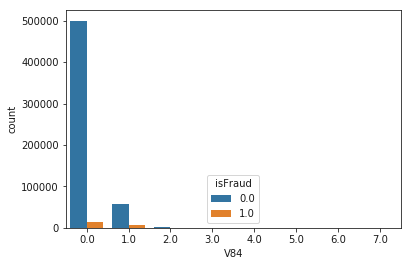

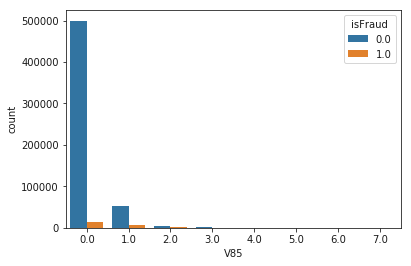

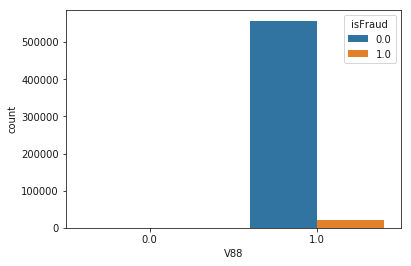

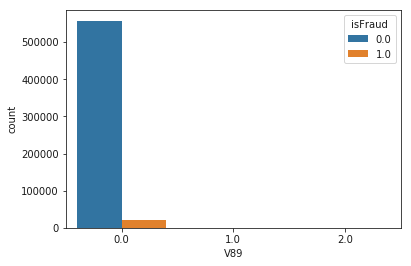

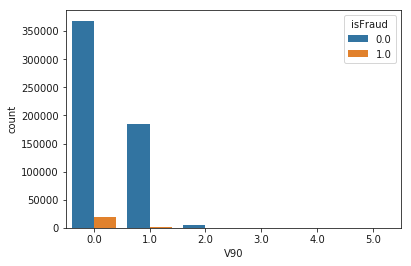

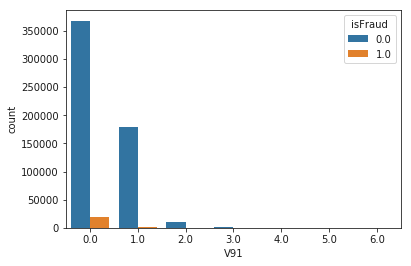

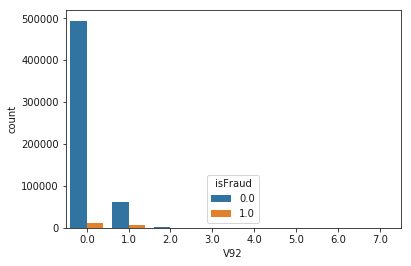

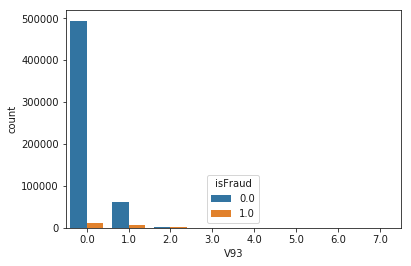

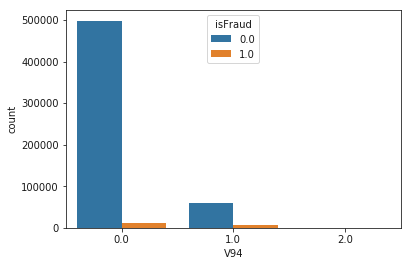

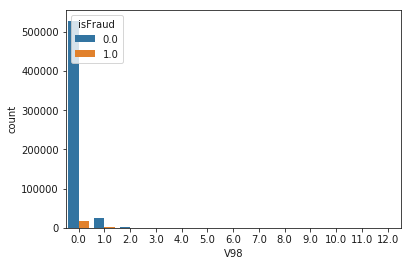

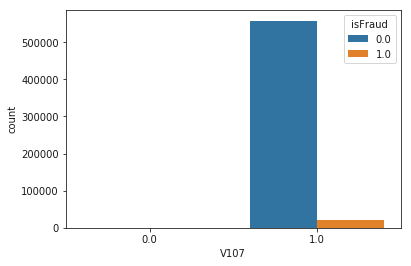

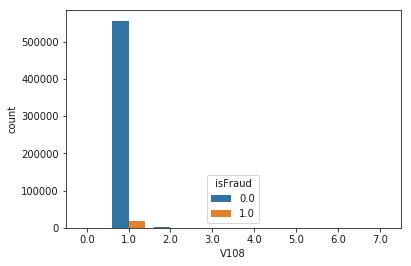

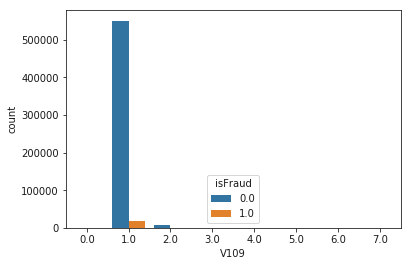

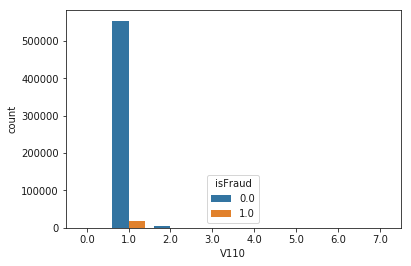

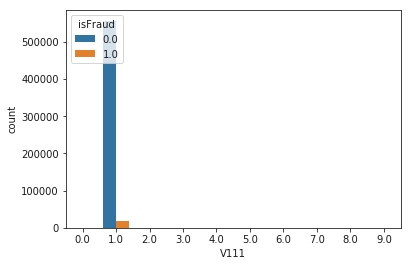

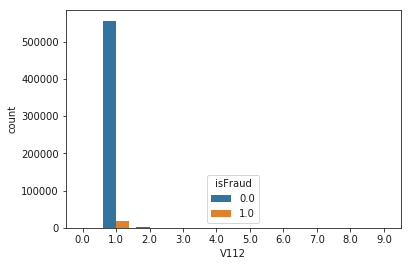

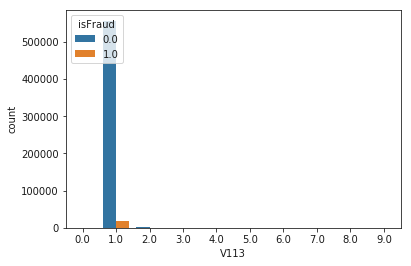

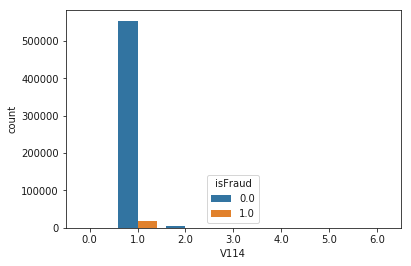

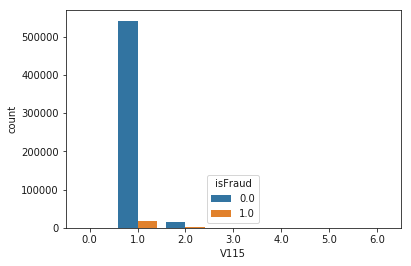

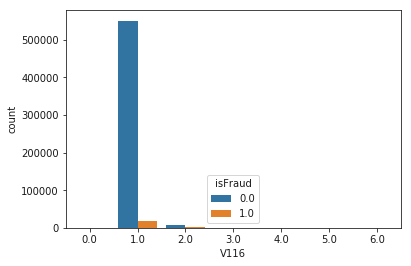

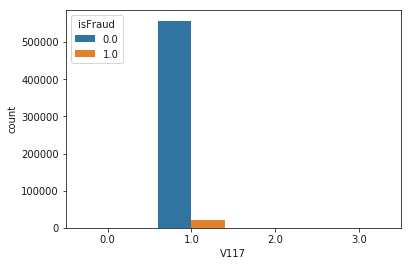

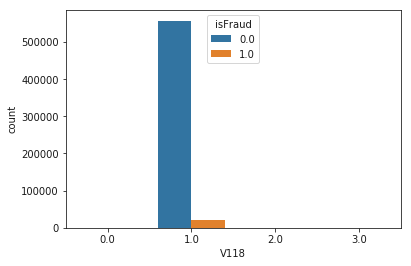

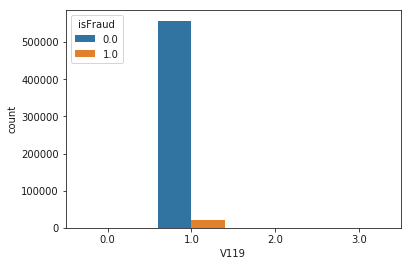

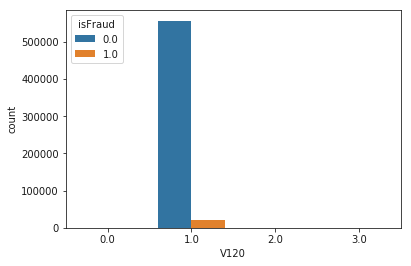

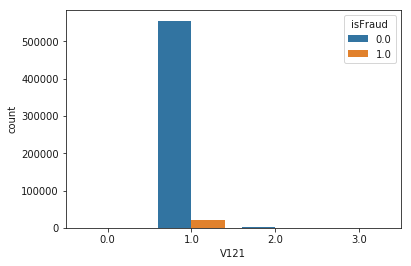

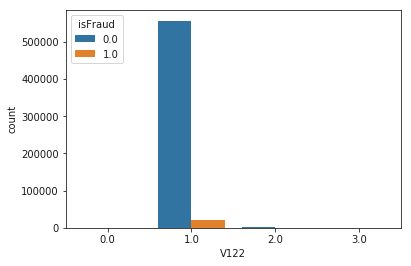

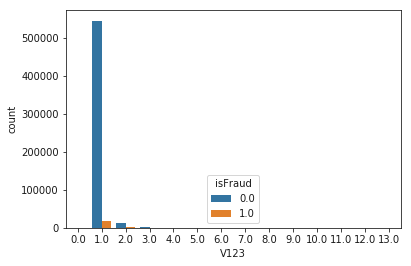

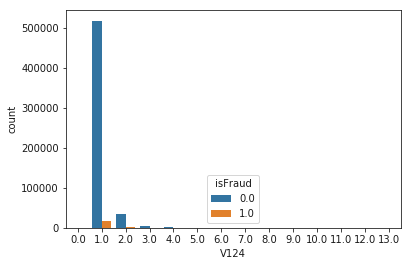

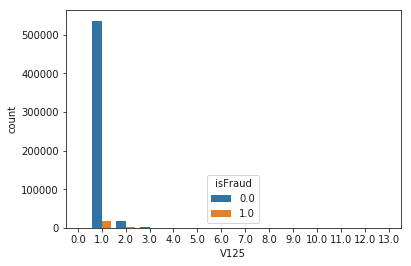

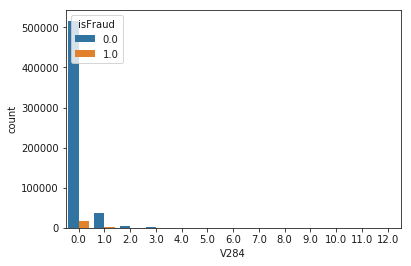

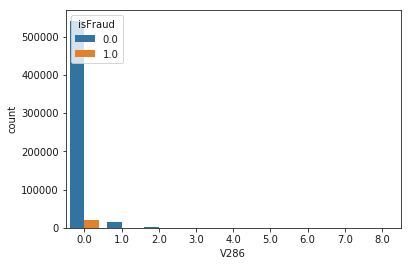

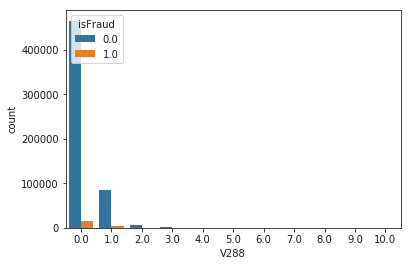

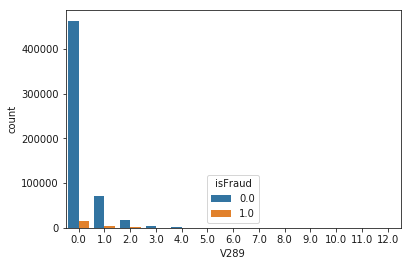

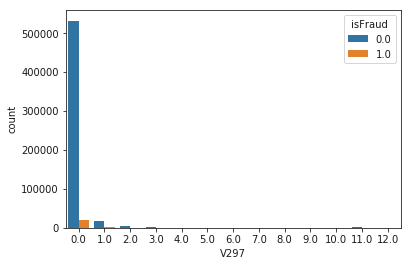

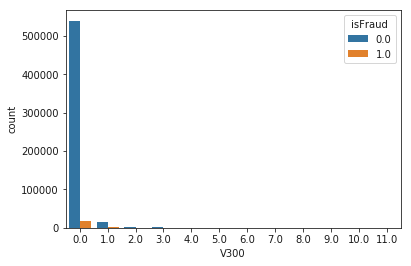

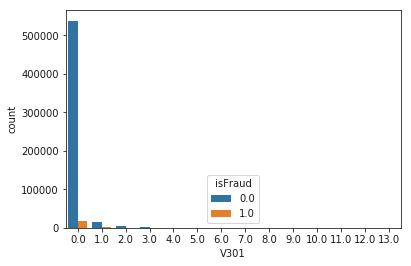

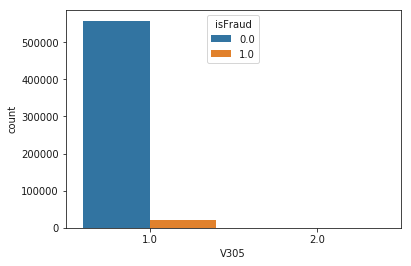

Wall time: 37.4 s


In [192]:
%%time
for col in train.columns[train.columns.str.startswith("V")]:
    if(train[col].nunique()>15):
        continue
    else:
        sns.countplot(data=train,x=col,hue="isFraud")
        plt.show()

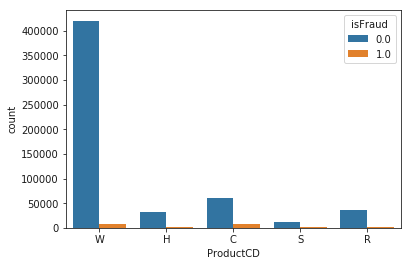

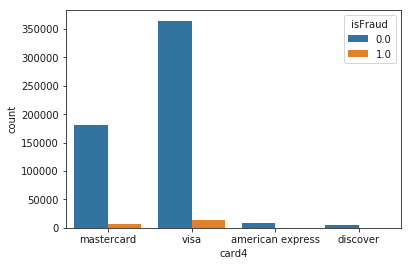

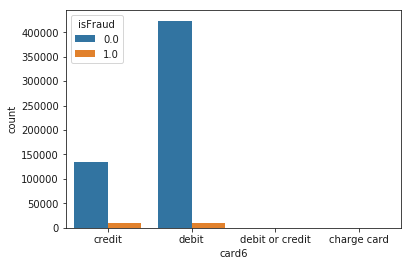

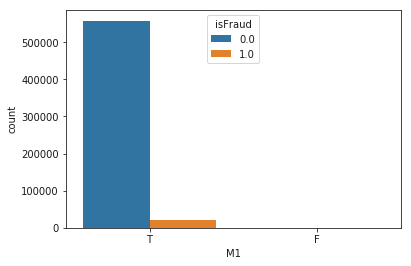

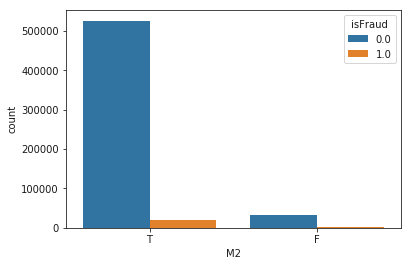

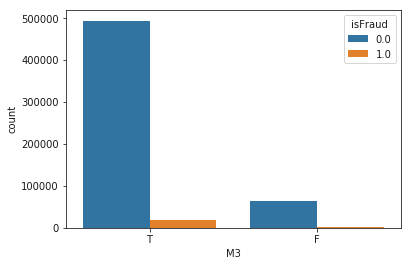

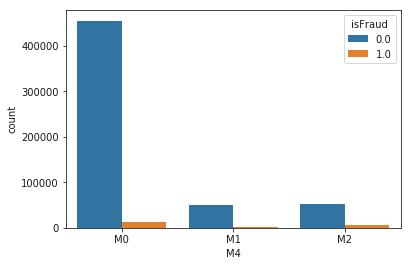

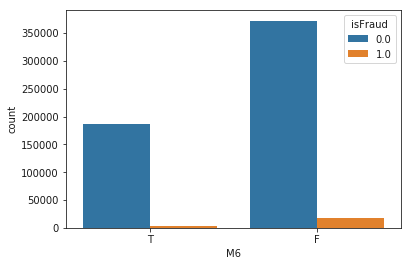

Wall time: 3.5 s


In [193]:
%%time
for col in train.select_dtypes(include="object").columns:
    if(train[col].nunique()>20):
        continue
    else:
        sns.countplot(data=train,x=col,hue="isFraud")
        plt.show()

In [194]:
train.shape

(578079, 227)

In [195]:
#sns.distplot(train.TransactionAmt,bins=20, rug=True);

In [196]:
train.isnull().sum().sort_values(ascending=False).head()

feature1_D15    0
V19             0
V45             0
V44             0
V43             0
dtype: int64

In [197]:
train.TransactionID.isnull().sum()

0

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578079 entries, 1 to 590539
Columns: 227 entries, TransactionID to feature1_D15
dtypes: float64(218), object(9)
memory usage: 1.0+ GB


In [199]:
train.memory_usage(deep=True).sum()

1361532298

In [200]:
train.describe().T

count          mean           std          min  \
TransactionID       578079.0  3.282152e+06  1.705885e+05  2987001.000   
isFraud             578079.0  3.462503e-02  1.828283e-01        0.000   
TransactionDT       578079.0  7.369386e+06  4.620045e+06    86401.000   
TransactionAmt      578079.0  1.340726e+02  2.298710e+02        0.251   
card1               578079.0  9.921322e+03  4.899275e+03     1000.000   
card2               578079.0  3.624715e+02  1.578826e+02      100.000   
card3               578079.0  1.532454e+02  1.139013e+01      100.000   
card5               578079.0  1.994656e+02  4.111447e+01      100.000   
addr1               578079.0  2.917059e+02  9.585504e+01      100.000   
C1                  578079.0  1.413882e+01  1.343473e+02        0.000   
C2                  578079.0  1.532786e+01  1.555781e+02        0.000   
C3                  578079.0  5.720671e-03  1.520010e-01        0.000   
C4                  578079.0  4.124566e+00  6.921873e+01        0.000   
C5                  578079.0  5.559936e+00  2.575886e+01        0.000   
C6                  578079.0  9.094736e+00  7.185940e+01        0.000   
C7                  578079.0  2.876392e+00  6.212587e+01        0.000   
C8                  578079.0  5.192882e+00  9.597208e+01        0.000   
C9                  578079.0  4.472797e+00  1.665990e+01        0.000   
C10                 578079.0  5.290050e+00  9.616263e+01        0.000   
C11                 578079.0  1.027673e+01  9.486097e+01        0.000   
C12                 578079.0  4.115946e+00  8.723131e+01        0.000   
C13                 578079.0  3.257573e+01  1.296116e+02        0.000   
C14                 578079.0  8.304586e+00  4.974414e+01        0.000   
D1                  578079.0  9.480263e+01  1.580228e+02        0.000   
D2                  578079.0  1.361838e+02  1.340313e+02        0.000   
D4                  578079.0  1.077009e+02  1.697463e+02     -122.000   
D10                 578079.0  1.103668e+02  1.746473e+02        0.000   
D11                 578079.0  9.787703e+01  1.448759e+02      -53.000   
D15                 578079.0  1.474993e+02  1.912224e+02      -83.000   
V1                  578079.0  9.999723e-01  5.260909e-03        0.000   
...                      ...           ...           ...          ...   
V301                578079.0  5.192197e-02  3.179266e-01        0.000   
V302                578079.0  2.540552e-01  4.833423e-01        0.000   
V303                578079.0  2.833592e-01  6.097217e-01        0.000   
V304                578079.0  2.661038e-01  5.282320e-01        0.000   
V305                578079.0  1.000007e+00  2.630482e-03        1.000   
V306                578079.0  1.408440e+02  2.372813e+03        0.000   
V307                578079.0  3.904069e+02  4.285724e+03        0.000   
V308                578079.0  2.282596e+02  3.041993e+03        0.000   
V309                578079.0  1.096413e+01  1.164383e+02        0.000   
V310                578079.0  1.187323e+02  3.541721e+02        0.000   
V311                578079.0  4.166706e+00  1.025964e+02        0.000   
V312                578079.0  3.928796e+01  1.725447e+02        0.000   
V313                578079.0  2.124803e+01  9.527056e+01        0.000   
V314                578079.0  4.318600e+01  1.731881e+02        0.000   
V315                578079.0  2.670286e+01  1.164008e+02        0.000   
V316                578079.0  1.109115e+02  2.293460e+03        0.000   
V317                578079.0  2.287231e+02  3.856739e+03        0.000   
V318                578079.0  1.597371e+02  2.810353e+03        0.000   
V319                578079.0  1.840679e+01  3.345319e+02        0.000   
V320                578079.0  4.213978e+01  4.765457e+02        0.000   
V321                578079.0  2.847127e+01  3.848529e+02        0.000   
feature1_ProductCD  578079.0  1.826584e-01  3.863866e-01        0.000   
feature2_ProductCD  578079.0  2.165967e-02  1.455698e-01        0.000   
feature3

In [201]:
#sns.distplot(train[train.columns[train.isnull().any()][3]].fillna("others"))

In [202]:
# from sklearn.preprocessing import Imputer
# # fill missing values with mean column values
# values = train.values
# imputer = Imputer()
# transformed_values = imputer.fit_transform(values)
# # count the number of NaN values in each column
# print(numpy.isnan(transformed_values).sum())

In [203]:
train.shape

(578079, 227)

In [215]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [205]:
#sns.countplot(x="M9",data=train)

In [206]:
train.groupby('isFraud').size()

isFraud
0.0    558063
1.0     20016
dtype: int64

In [207]:
categorical_cols=train.select_dtypes(include="object").columns

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures

In [209]:
X=train.iloc[:,2:]
y=train.iloc[:,1]

# Make Heat Maps to find correlations

In [210]:
#Use Pearson correlations

In [216]:
numerical_cols=[]
for col in X.select_dtypes(exclude="object").columns[1:]:
    if X[col].nunique()==2:
        continue
    else:
        numerical_cols.append(col)

In [217]:
len(numerical_cols)

199

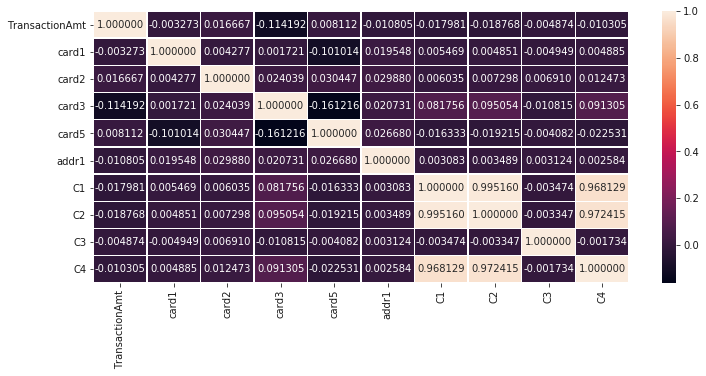

In [221]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[0:10]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

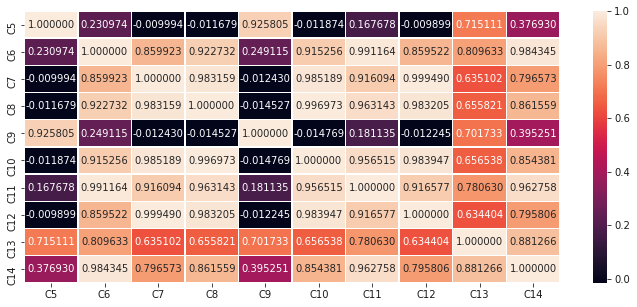

In [222]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[10:20]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

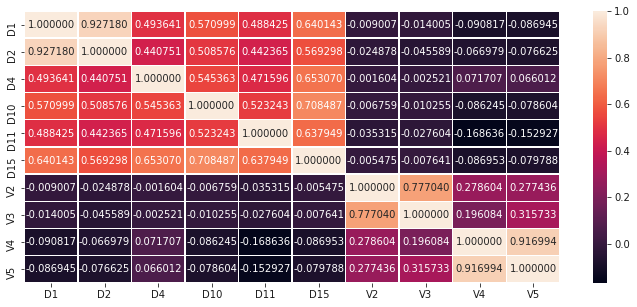

In [223]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[20:30]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

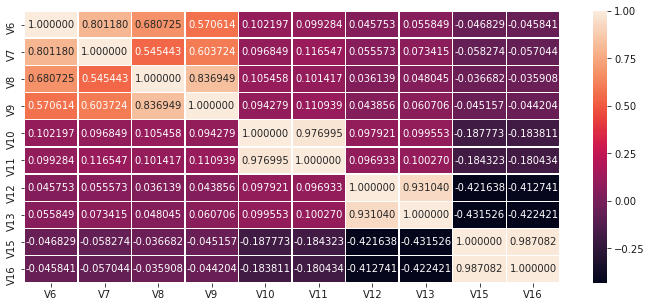

In [224]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[30:40]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

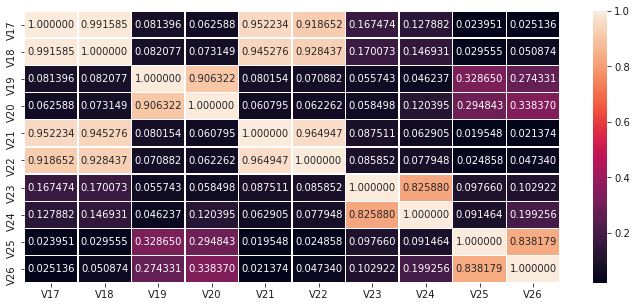

In [225]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[40:50]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

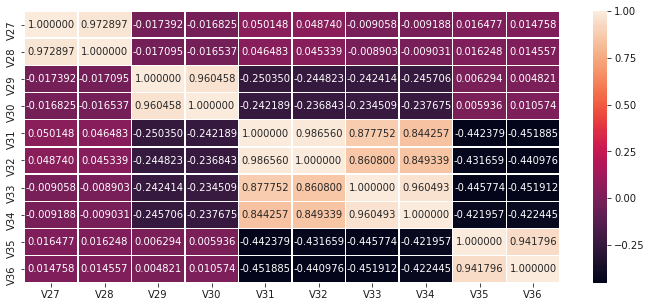

In [226]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[50:60]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

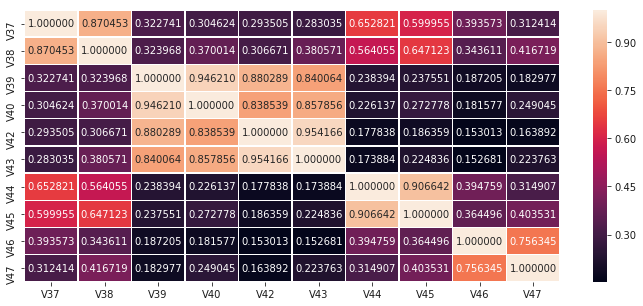

In [227]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[60:70]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

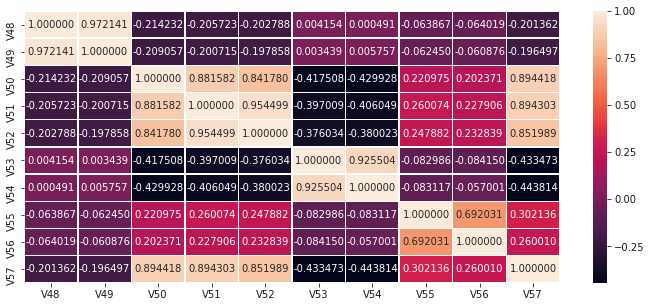

In [228]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[70:80]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

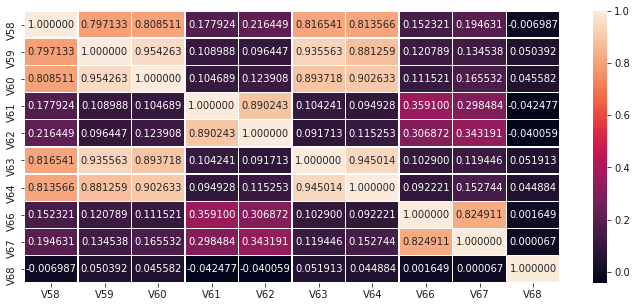

In [229]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[80:90]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

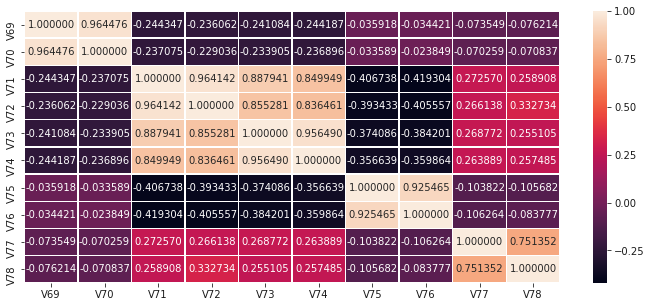

In [231]:
fig,ax=plt.subplots(figsize=(12,5))
sns.heatmap(X[numerical_cols[90:100]].corr(),annot=True,fmt="f",linewidths=.5,ax=ax)

# Make Heat maps to find correlations in categorical variables using spearman's method

In [ ]:
#Use spearman correlations

In [ ]:
encoder=LabelEncoder()

In [ ]:
for col in categorical_cols:
    X[col]=encoder.fit_transform(X[col])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#rf=RandomForestClassifier(n_estimators=100)
rf=LGBMClassifier(learning_rate=0.01,n_estimators=100,num_leaves=20,random_state=42,reg_alpha=0.5)

In [ ]:
%%time
rf.fit(X_train,y_train)

In [ ]:
predictions=rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,roc_auc_score,roc_curve

In [ ]:
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print("ROC score : ",roc_auc_score(y_test,predictions))

In [ ]:
%%time
test_identity=pd.read_csv("test_identity.csv")
test_transaction=pd.read_csv("test_transaction.csv")

In [ ]:
test_identity.id_01=[x if x>=-20 else -10 for x in test_identity.id_01]
test_identity.id_03=[1 if x>0 else (-1 if x<0 else 0) for x in test_identity.id_03]
test_identity.id_04=[1 if x<0 else x for x in test_identity.id_04]
test_identity.id_09=[1 if x>0 else (-1 if x<0 else 0) for x in test_identity.id_09]
test_identity.id_10=[1 if x<0 else x for x in test_identity.id_10]
test_identity.id_02.fillna(test_identity.id_02.median(),inplace=True)
test_identity.id_05=[x if x>0 else -1 for x in test_identity.id_05]
test_identity.id_10.fillna(0,inplace=True)


In [ ]:
#test_identity.id_13.mode()[0]
test_identity.id_13.fillna(test_identity.id_13.mode()[0],inplace=True)


In [ ]:
test_identity.id_14=[1 if x >0 else (-1 if x < 0 else 0) for x in test_identity.id_14]
test_identity.id_15.fillna("Unknown",inplace=True)
test_identity.id_16.fillna("NotFound",inplace=True)
test_identity.id_29.fillna("NotFound",inplace=True)
test_identity.id_32.fillna(24,inplace=True)
test_identity.id_34=[1 if x=="match_status:1" else x for x in test_identity.id_34]
test_identity.id_34=[2 if x=="match_status:2" else x for x in test_identity.id_34]
test_identity.id_34=[-1 if x=="match_status:-1" else x for x in test_identity.id_34]
test_identity.id_34=[0 if x=="match_status:0" else x for x in test_identity.id_34]
test_identity.id_34.fillna(-1,inplace=True)
test_identity.id_06.fillna(0,inplace=True)
test_identity.id_13.fillna(52,inplace=True)
test_identity.id_17.fillna(166,inplace=True)
test_identity.id_18.fillna(15,inplace=True)
test_identity.id_19.fillna(test_identity.id_19.median(),inplace=True)

In [ ]:
%%time
test=test_transaction.merge(test_identity,how="left",on="TransactionID")

In [ ]:
temp_list=list(X.columns)

In [ ]:
temp_list.append("TransactionID")

In [ ]:
test.shape

In [ ]:
test.loc[test.addr1.isna(),"addr1"]=test.addr1.median()
test.loc[test.dist1.isna(),"dist1"]=0
test.dist1=[0 if x<=28 else 1 for x in test.dist1]
test.loc[test.D2.isna(),"D2"]=test.D2.median()
test.loc[test.P_emaildomain.isna(),"P_emaildomain"]="gmail.com"
test["Feature1_D3"]=[1 if x>600 else 0 for x in test.D3]
test.loc[test.D4.isna(),"D4"]=test.D4.median()
test["feature1_D4"]=[1 if x<0 else 0 for x in test.D4]
test["feature2_D4"]=[1 if x<600 else 0 for x in test.D4]
test.D5.fillna(test.D5.median(),inplace=True)
test["feature1_D5"]=[1 if x>630 else 0 for x in test.D5]
test.D10.fillna(test.D10.median(),inplace=True)
test["feature1_D10"]=[1 if x>630 else 0 for x in test.D10]
test.D11.fillna(test.D11.median(),inplace=True)
test["feature1_D11"]=[1 if x<0 else 0 for x in test.D11]
test.D15.fillna(test.D15.median(),inplace=True)
test["feature1_D15"]=[1 if x<0 else 0 for x in test.D15]

In [ ]:
test_copy=test[temp_list].copy()

In [ ]:
test_copy.columns[test_copy.isnull().any()]

In [ ]:
for col in test.select_dtypes(include="object").columns:
    test.loc[test[col].isna(),col]=test[col].mode()[0]

for col in test.select_dtypes(exclude="object").columns:
    test.loc[test[col].isna(),col]=test[col].median()

In [ ]:
#Number of columns with null rows
len(test.columns[test.isnull().any()])

In [ ]:
for col in categorical_cols:
    test[col]=encoder.fit_transform(test[col])

In [ ]:
%%time
test_prediction=rf.predict_proba(test[X.columns])

In [ ]:
test["isFraud"]=test_prediction[:,1]

In [ ]:
test.TransactionID.dtype

In [ ]:
test.loc[:,"TransactionID"]=test.TransactionID.astype("int32")

In [ ]:
test[["TransactionID","isFraud"]].to_csv("./submissions/submission_Aug10.csv",index=False)